In [ ]:
import os
import pandas as pd
import networkx as nx
pd.set_option('display.max_colwidth', 200)
import matplotlib.pyplot as plt

In [ ]:
!git clone https://github.com/ShubhamBhardwaj1971/COVID-19.git

Cloning into 'COVID-19'...
remote: Enumerating objects: 43, done.
remote: Counting objects: 100% (43/43), done.
remote: Compressing objects: 100% (34/34), done.
remote: Total 43 (delta 19), reused 26 (delta 9), pack-reused 0
Unpacking objects: 100% (43/43), done.


In [ ]:
ls

COVID-19/  sample_data/


In [ ]:
cd COVID-19

/content/COVID-19


In [ ]:
pwd

'/content/COVID-19'

In [ ]:
def generate_covid_corpus(covid_folder):
    corona_corpus = pd.DataFrame()
    for path, subdirs, files in os.walk(covid_folder):
      for name in files:
        covid_who = name.split('.')[0]
        covid_csv = os.path.join(path, name)
        covid_df=pd.read_csv(covid_csv)
        covid_content = covid_df[~covid_df.Relation.isin(['COVID WHO Research Paper Title'])]
        covid_object_list = list(covid_content['Target'])
        covid_reference =  [[covid_object_list[i],'Research Paper',covid_who] for i in range(len(covid_content))]
        covid_reference = pd.DataFrame(covid_reference) 
        covid_reference.columns = ['Source','Relation','Target']
        covid_data = covid_df.append(covid_reference)
        corona_corpus = corona_corpus.append(covid_data)
        corona_corpus = corona_corpus.drop_duplicates() 
    return corona_corpus

In [ ]:
corona_corpus = generate_covid_corpus('/content/COVID-19/Curated_Dataset')

In [ ]:
corona_corpus

,Source,Relation,Target
0,COVID-WHO-614382,COVID WHO Research Paper Title,Shielding and Beyond: The Roles of Glycans in SARS-CoV-2 Spike Protein
1,COVID-19,Causative virus,SARS-CoV-2
2,SARS-CoV-2,Full form,Severe acute respiratory syndrome coronavirus 2
3,Antibody development efforts,Revolve around,Spike (S) protein
4,Spike (S) protein,Function,Mediates host cell entry by binding to Angiotensin-converting enzyme 2 (ACE2)
...,...,...,...
302,Had viral clearance at an average of 7 days,Research Paper,COVID-WHO-616028
303,Treated with lopinavir/ritonavir,Research Paper,COVID-WHO-616028
306,Had viral clearance at an average of 12 days,Research Paper,COVID-WHO-616028
307,Trace together,Research Paper,COVID-WHO-616028


In [ ]:
def generate_graph_layout(pairs):
    k_graph = nx.from_pandas_edgelist(pairs, 'Source', 'Target', create_using=nx.MultiDiGraph())
    node_deg = nx.degree(k_graph)
    layout = nx.spring_layout(k_graph, k=0.15, iterations=20)
    plt.figure(num=None, figsize=(120, 22.5), dpi=80)
    nx.draw_networkx(
	    k_graph,
        node_size=[1000 for deg in node_deg],
        arrowsize=20,
        linewidths=1.5,
        pos=layout,
        edge_color='red',
        edgecolors='black',
        node_color='white',
        )
    labels = dict(zip(list(zip(pairs.Source, pairs.Target)),pairs['Relation'].tolist()))
    nx.draw_networkx_edge_labels(k_graph, pos=layout, edge_labels=labels,font_color='red')
    plt.axis('off')
    plt.show()

In [ ]:
def generate_entire_graph(pairs,ref):
    if(ref== False):
      pairs = pairs[~pairs.Relation.isin(['COVID WHO Research Paper Title','Research Paper'])]    
    generate_graph_layout(pairs)

	
def generate_node_subgraph(pairs,node,ref):
    if(ref== False):
      pairs = pairs[~pairs.Relation.isin(['COVID WHO Research Paper Title','Research Paper'])]    
    G = nx.from_pandas_edgelist(pairs, 'Source', 'Target', create_using=nx.MultiGraph())
    node_list = list(nx.node_connected_component(G,node))
    pairs = pairs[pairs.Source.isin(node_list) & pairs.Target.isin(node_list)]
    generate_graph_layout(pairs)
     
	 
def generate_relation_link(pairs,node,Relation,ref):
    if(ref== False):
      pairs = pairs[~pairs.Relation.isin(['COVID WHO Research Paper Title','Research Paper'])]   
    G = nx.from_pandas_edgelist(pairs, 'Source', 'Target', create_using=nx.MultiGraph())
    node_list = list(nx.node_connected_component(G,node))
    pairs = pairs[pairs.Source.isin([node]) & pairs.Relation.isin([Relation])]
    generate_graph_layout(pairs)

def depth_based_subgraph(pairs,node,depth,ref):
    if(ref== False):
      pairs = pairs[~pairs.Relation.isin(['COVID WHO Research Paper Title','Research Paper'])]   
    G = nx.from_pandas_edgelist(pairs, 'Source', 'Target', create_using=nx.MultiGraph())
    F = nx.bfs_tree(G, source=node, depth_limit=depth)
    total_list = list(nx.node_connected_component(F.to_undirected(),node))
    pairs = pairs[pairs.Source.isin(total_list) & pairs.Target.isin(total_list)]
    generate_graph_layout(pairs)

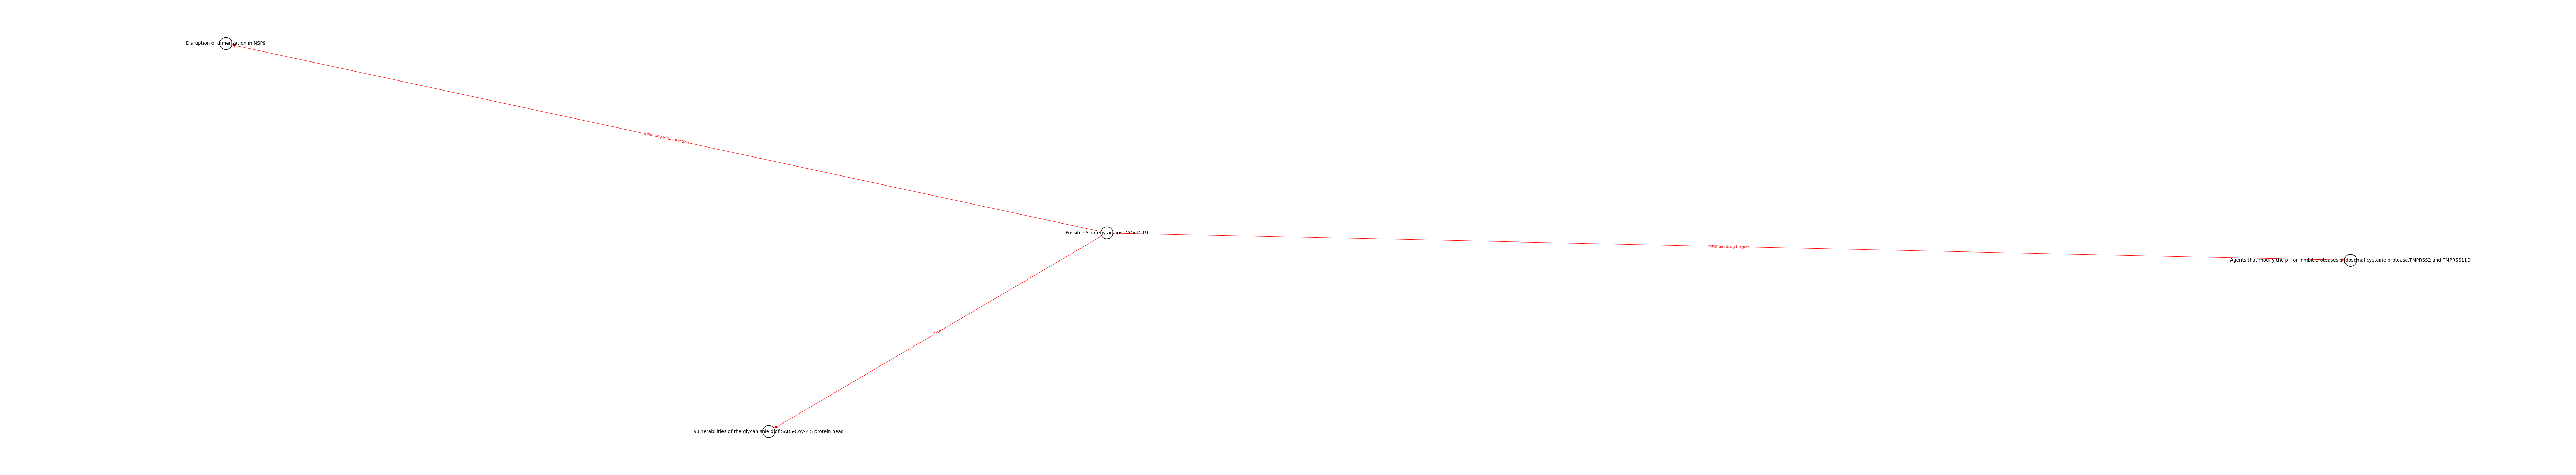

In [ ]:
depth_based_subgraph(corona_corpus,'Possible Strategy against COVID-19',1,False)

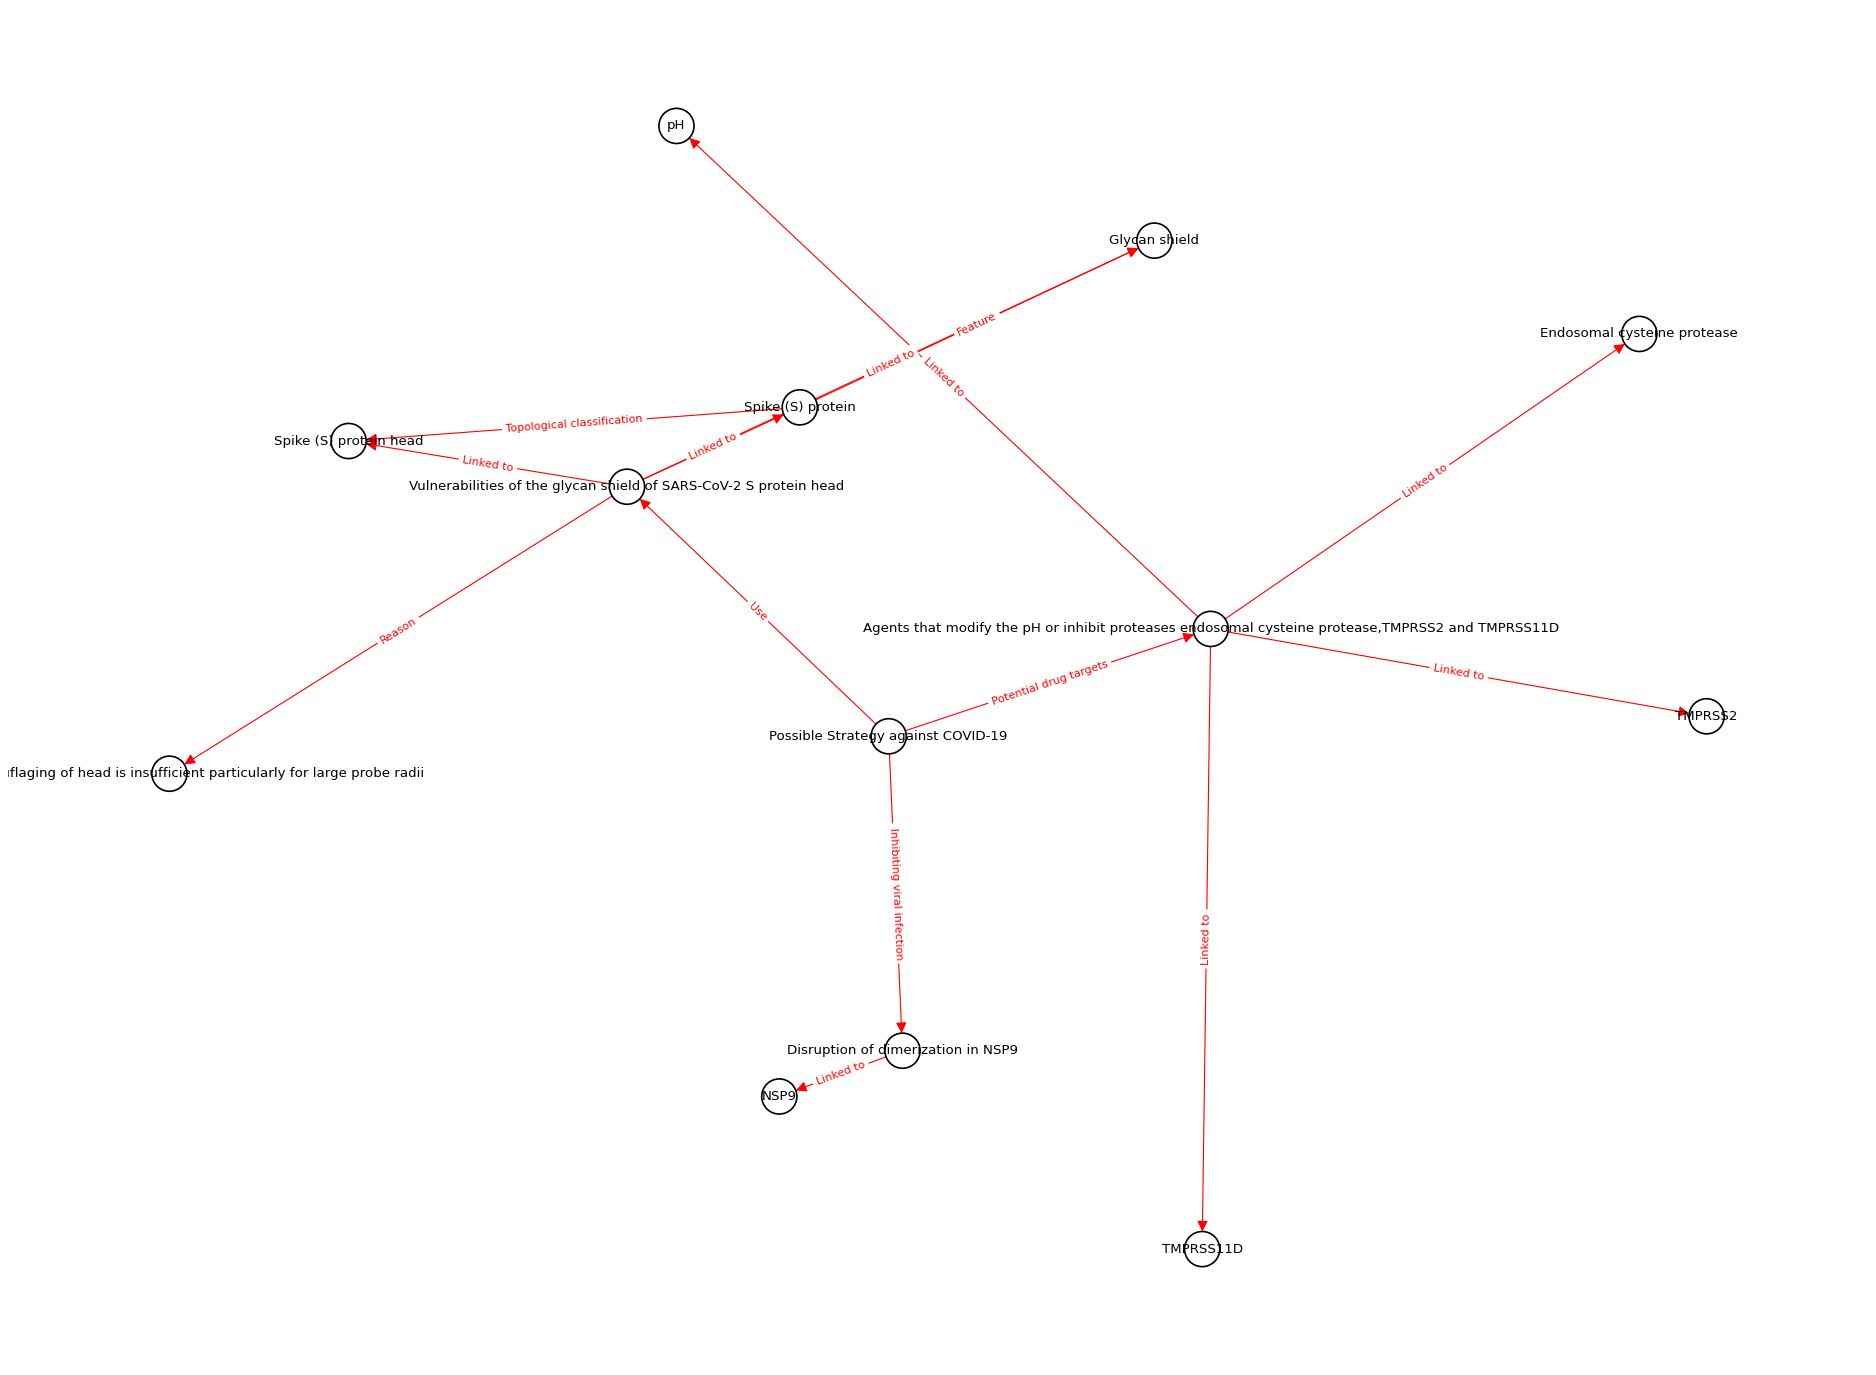

In [ ]:
depth_based_subgraph(corona_corpus,'Possible Strategy against COVID-19',2,False)

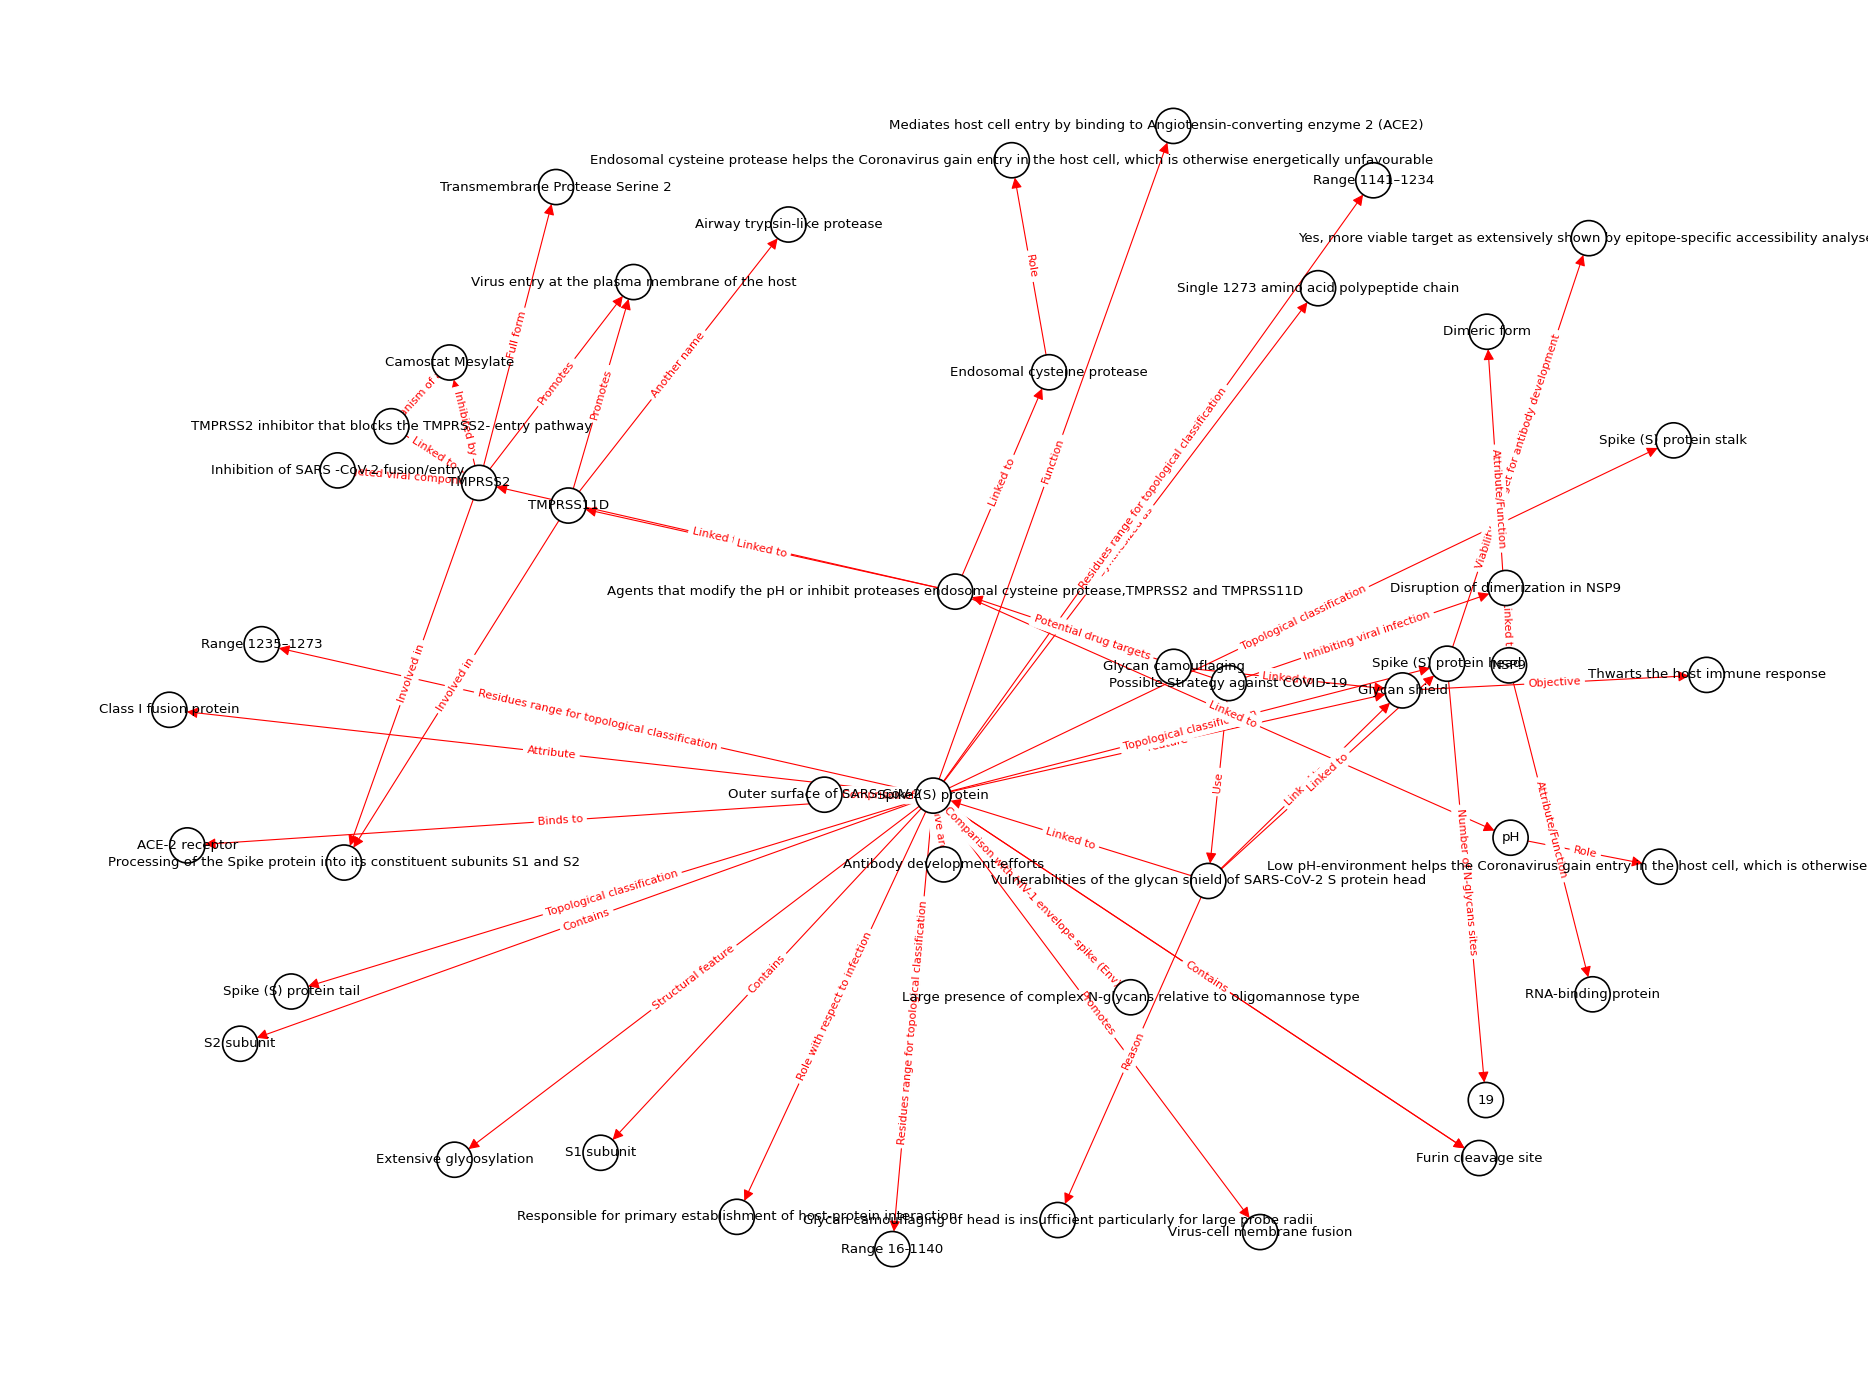

In [ ]:
depth_based_subgraph(corona_corpus,'Possible Strategy against COVID-19',3,False)

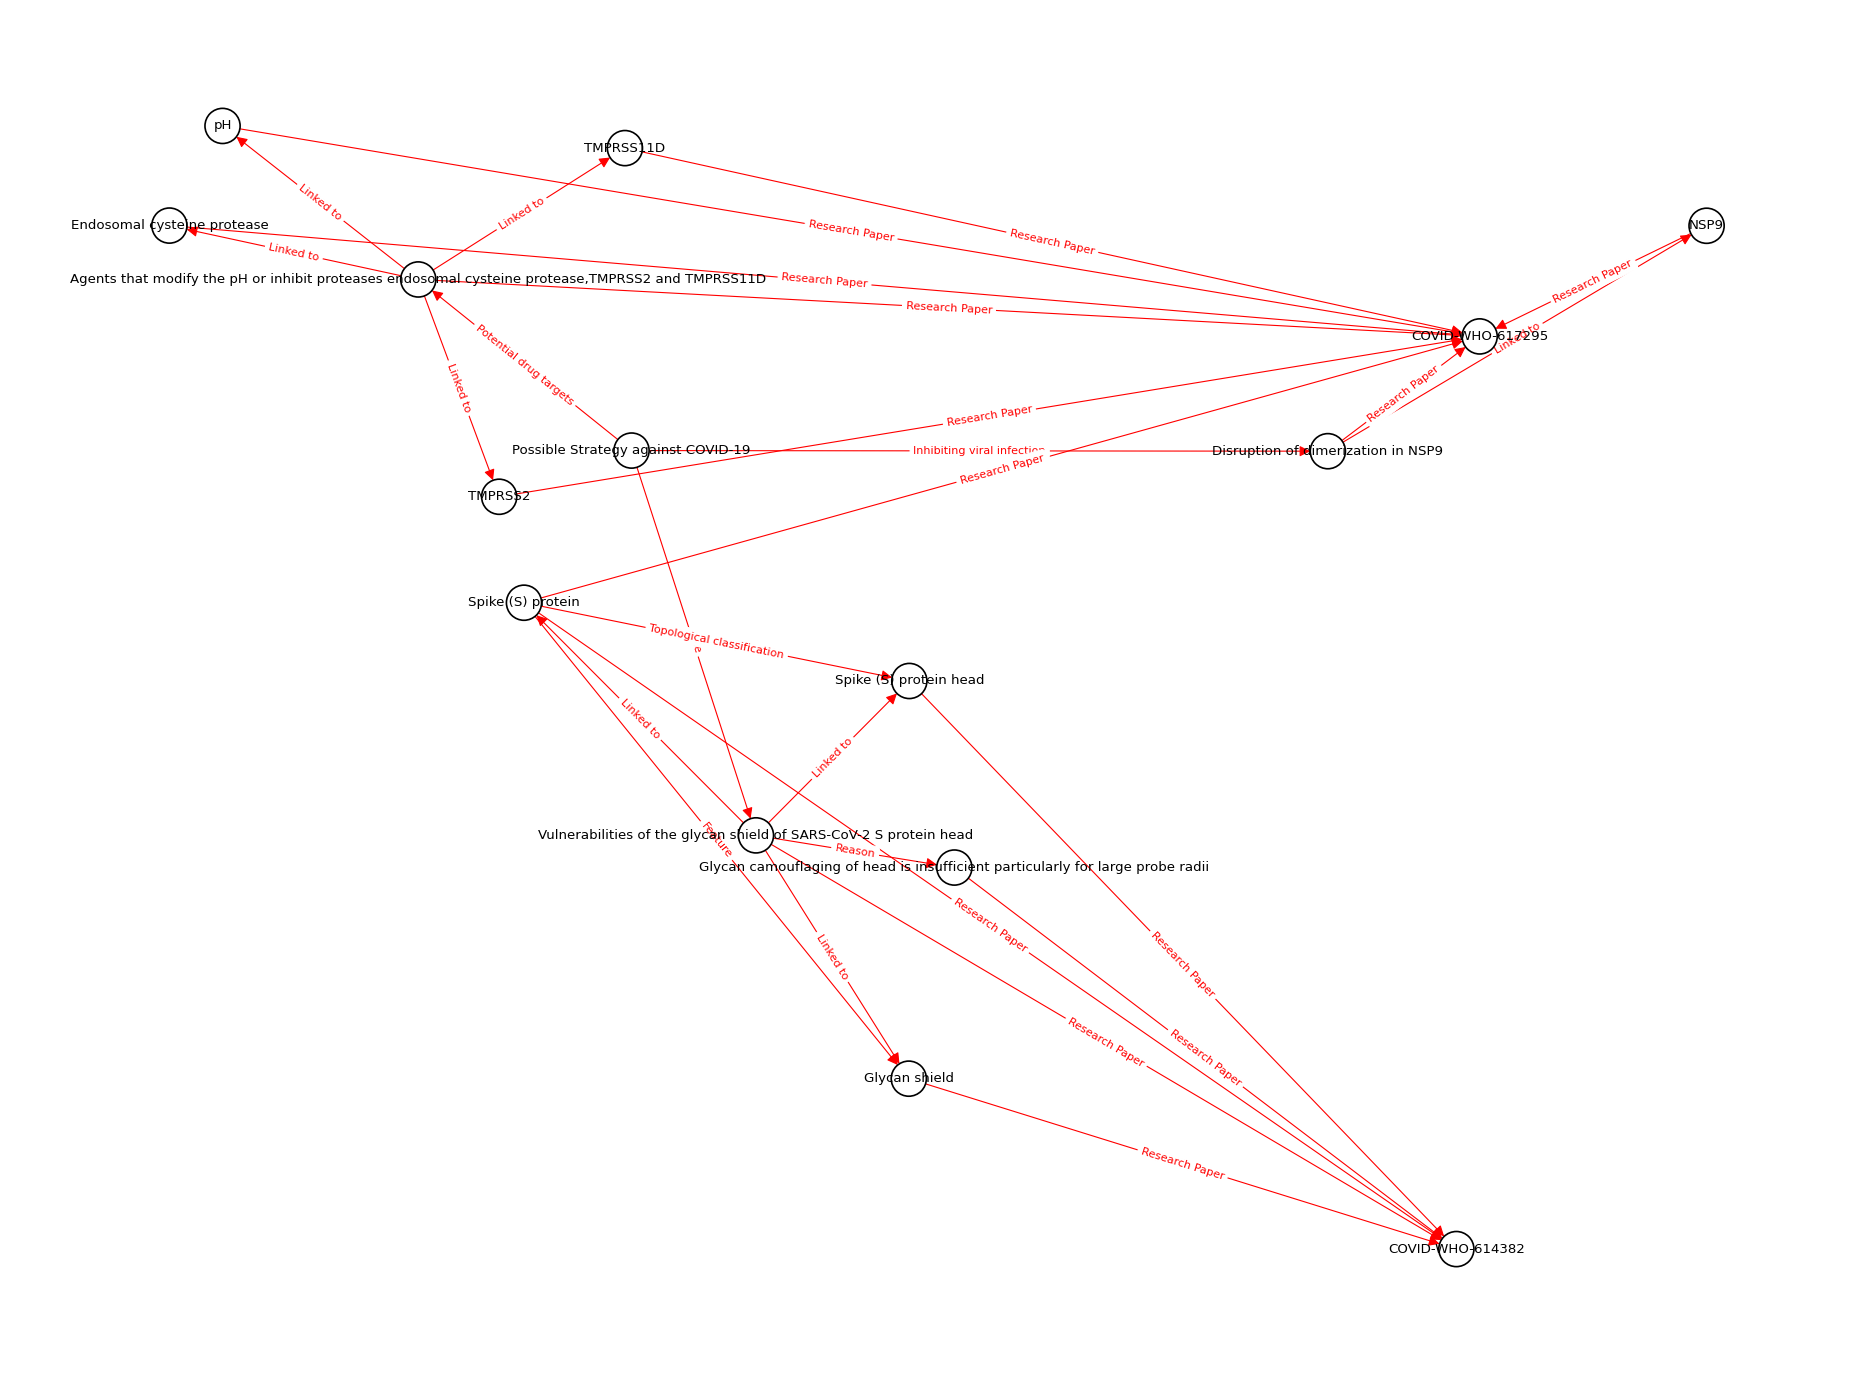

In [ ]:
depth_based_subgraph(corona_corpus,'Possible Strategy against COVID-19',2,True)

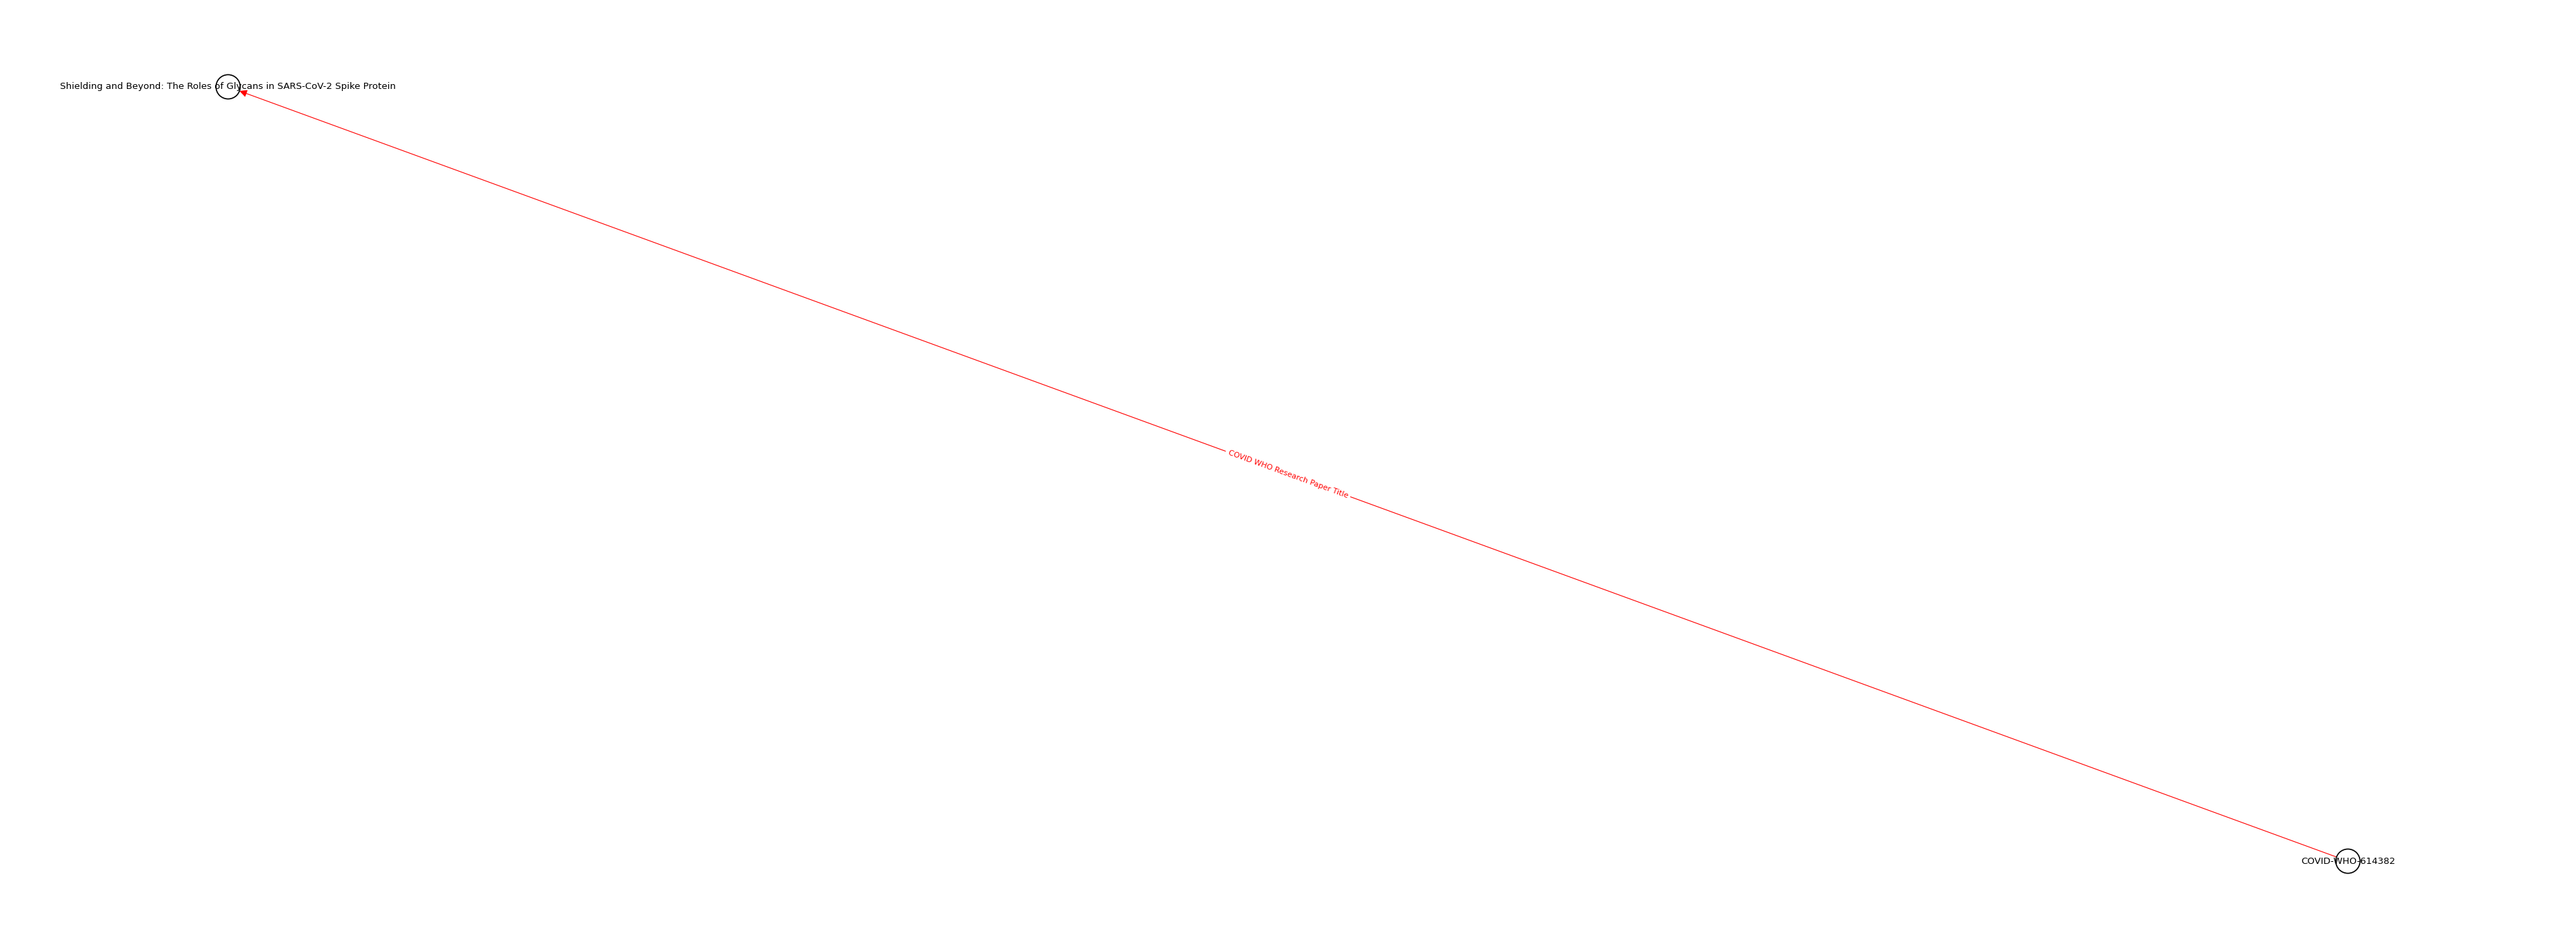

In [ ]:
generate_relation_link(corona_corpus,'COVID-WHO-614382','COVID WHO Research Paper Title',True)

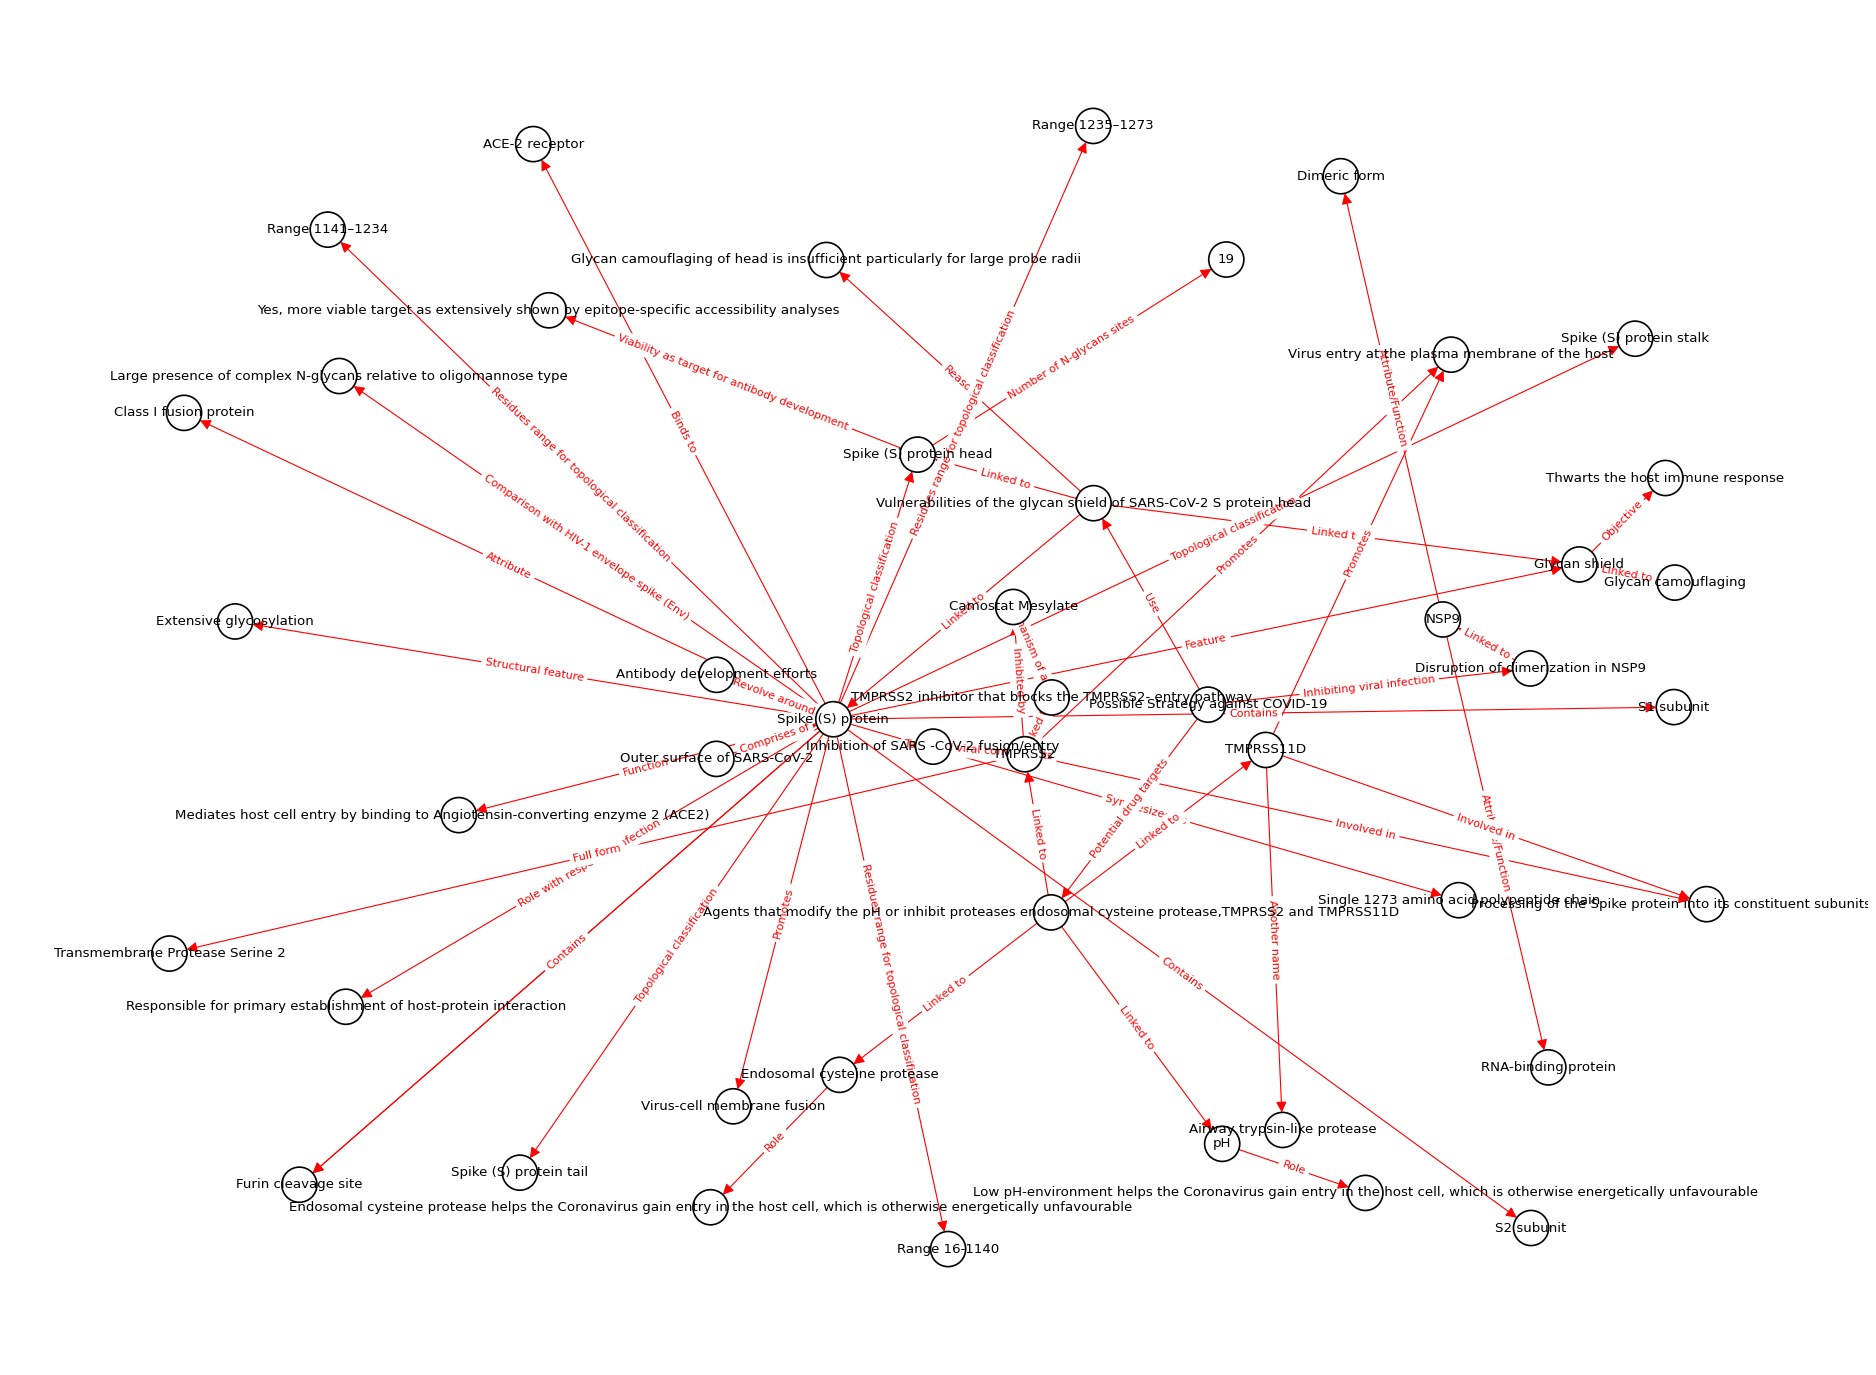

In [ ]:
depth_based_subgraph(corona_corpus,'Possible Strategy against COVID-19',3,False)

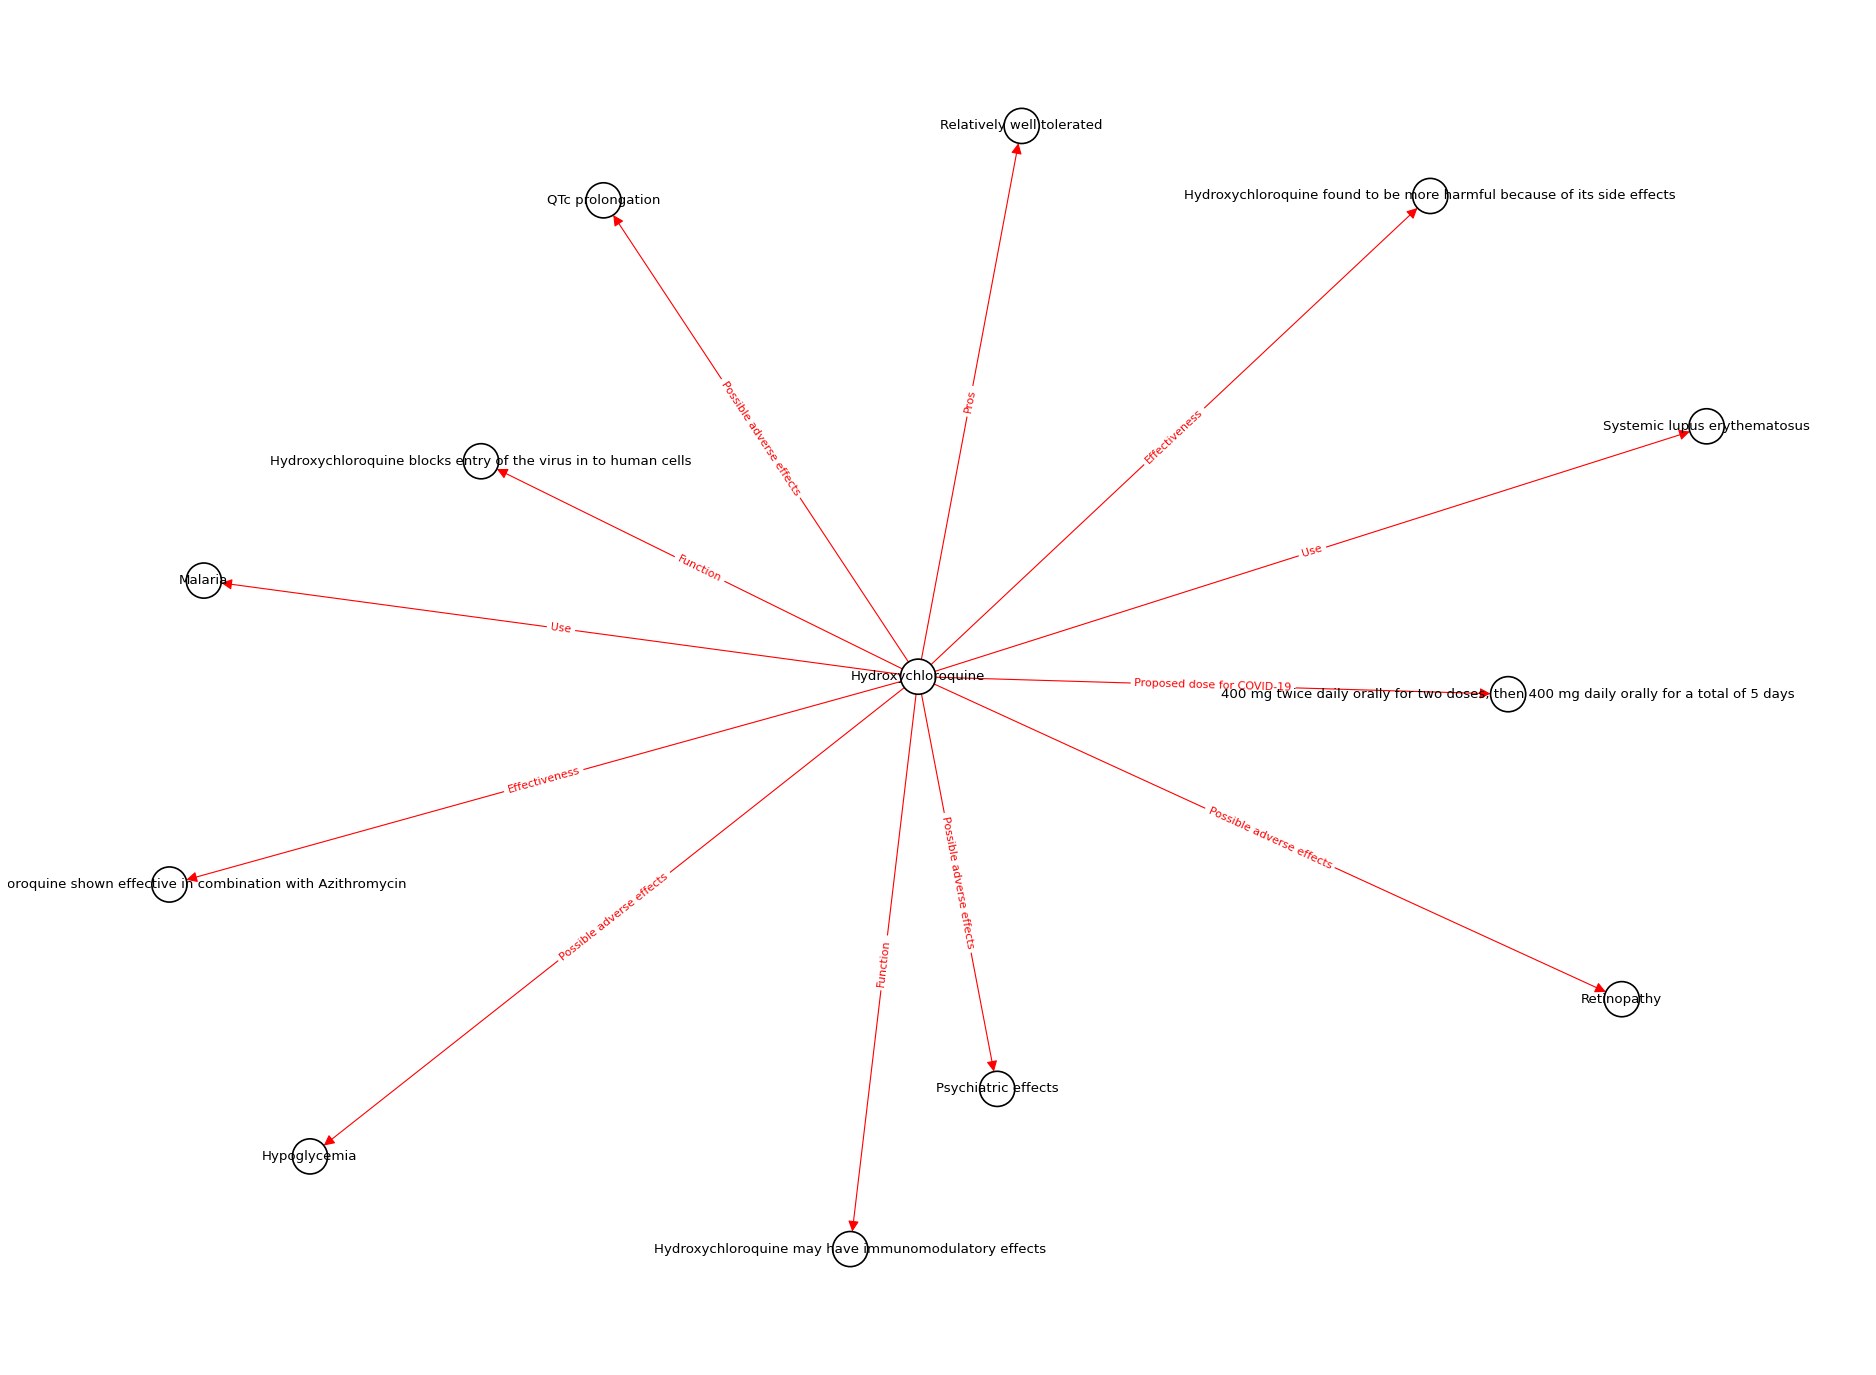

In [ ]:
depth_based_subgraph(corona_corpus,'Hydroxychloroquine',1,False)

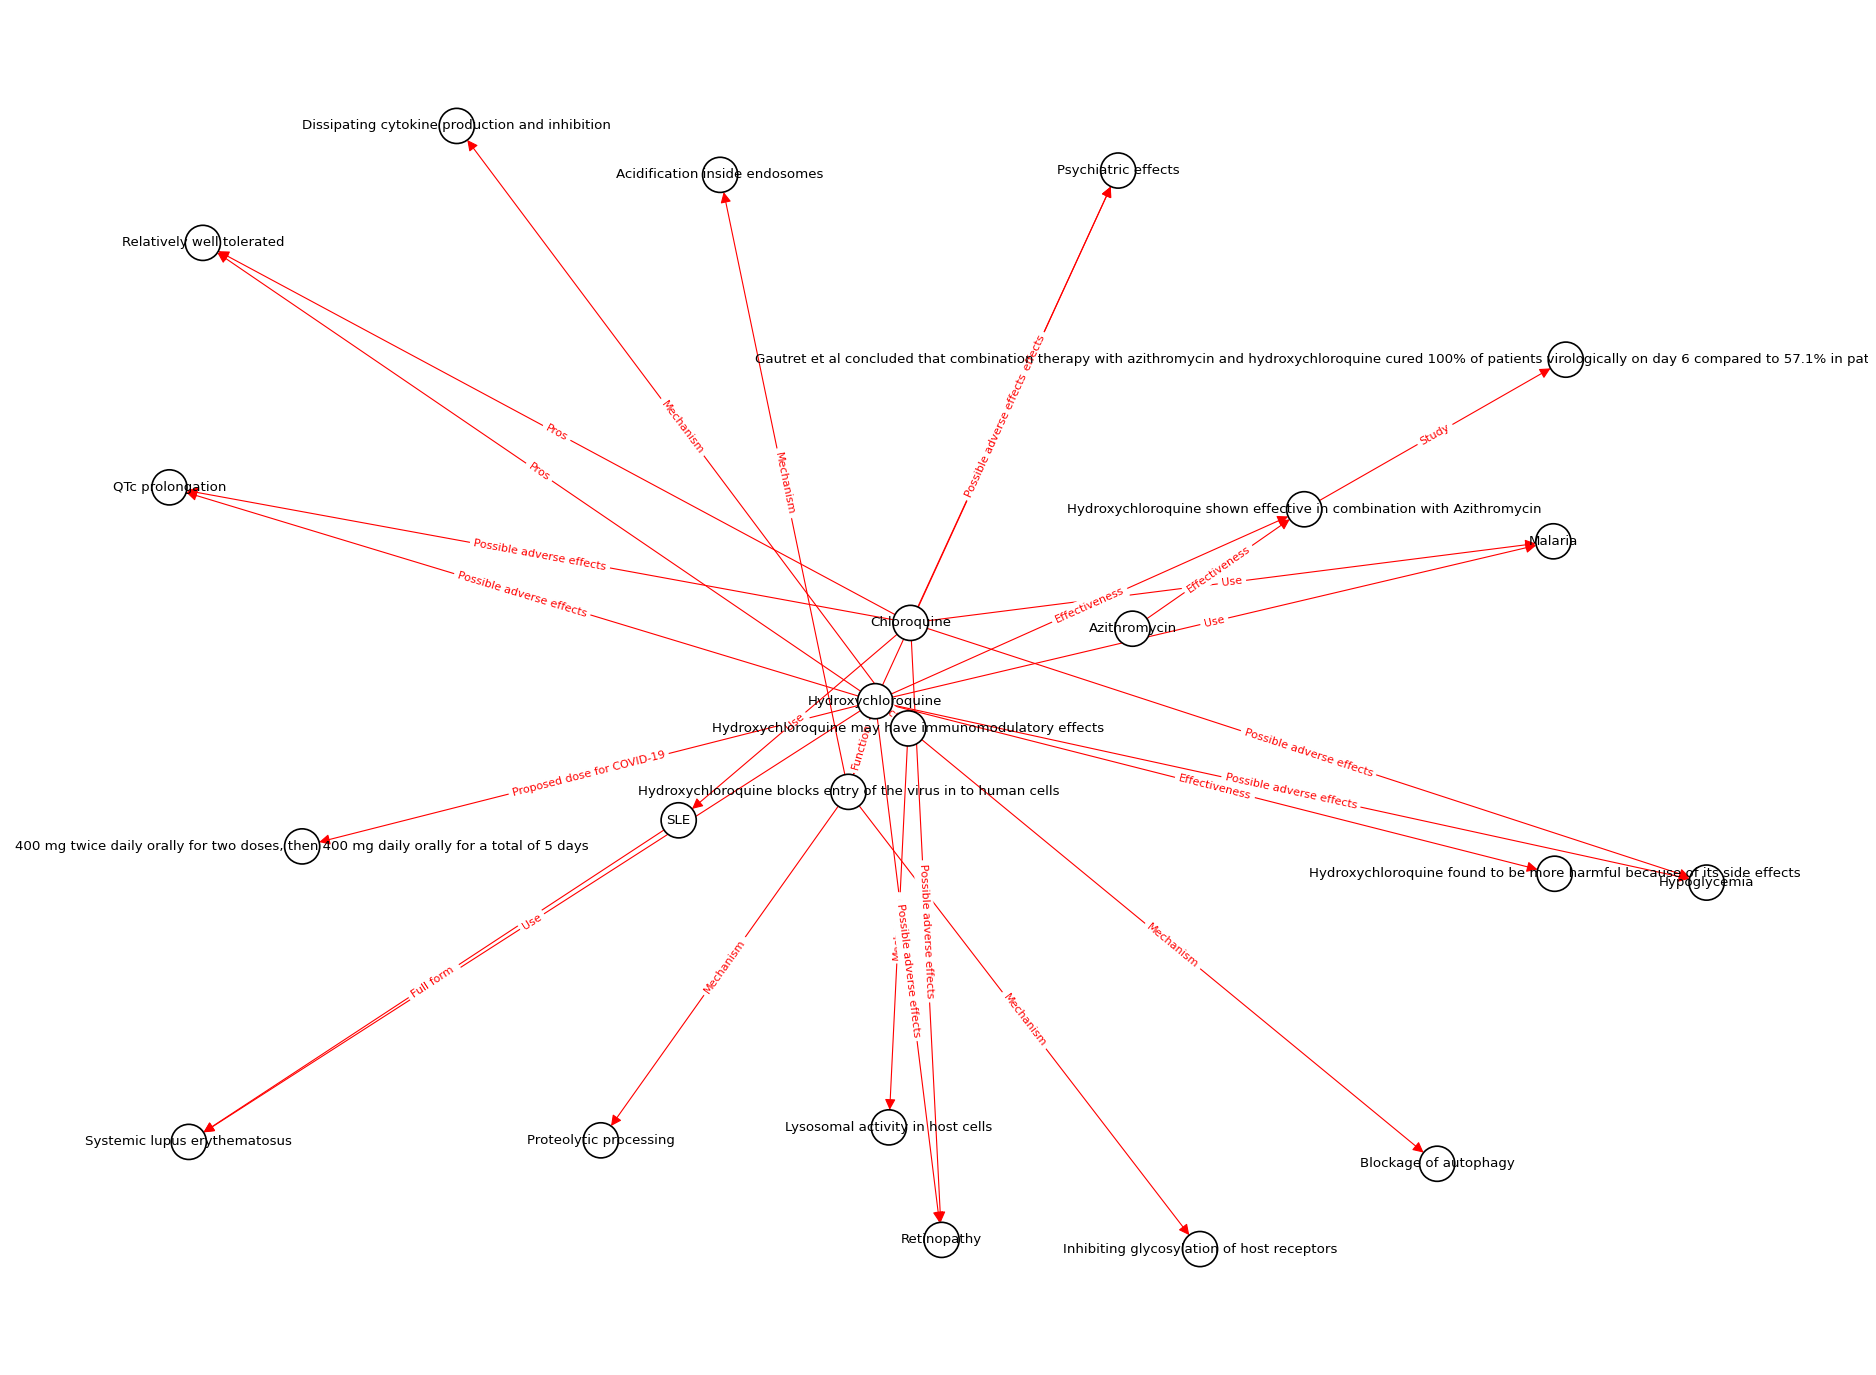

In [ ]:
depth_based_subgraph(corona_corpus,'Hydroxychloroquine',2,False)

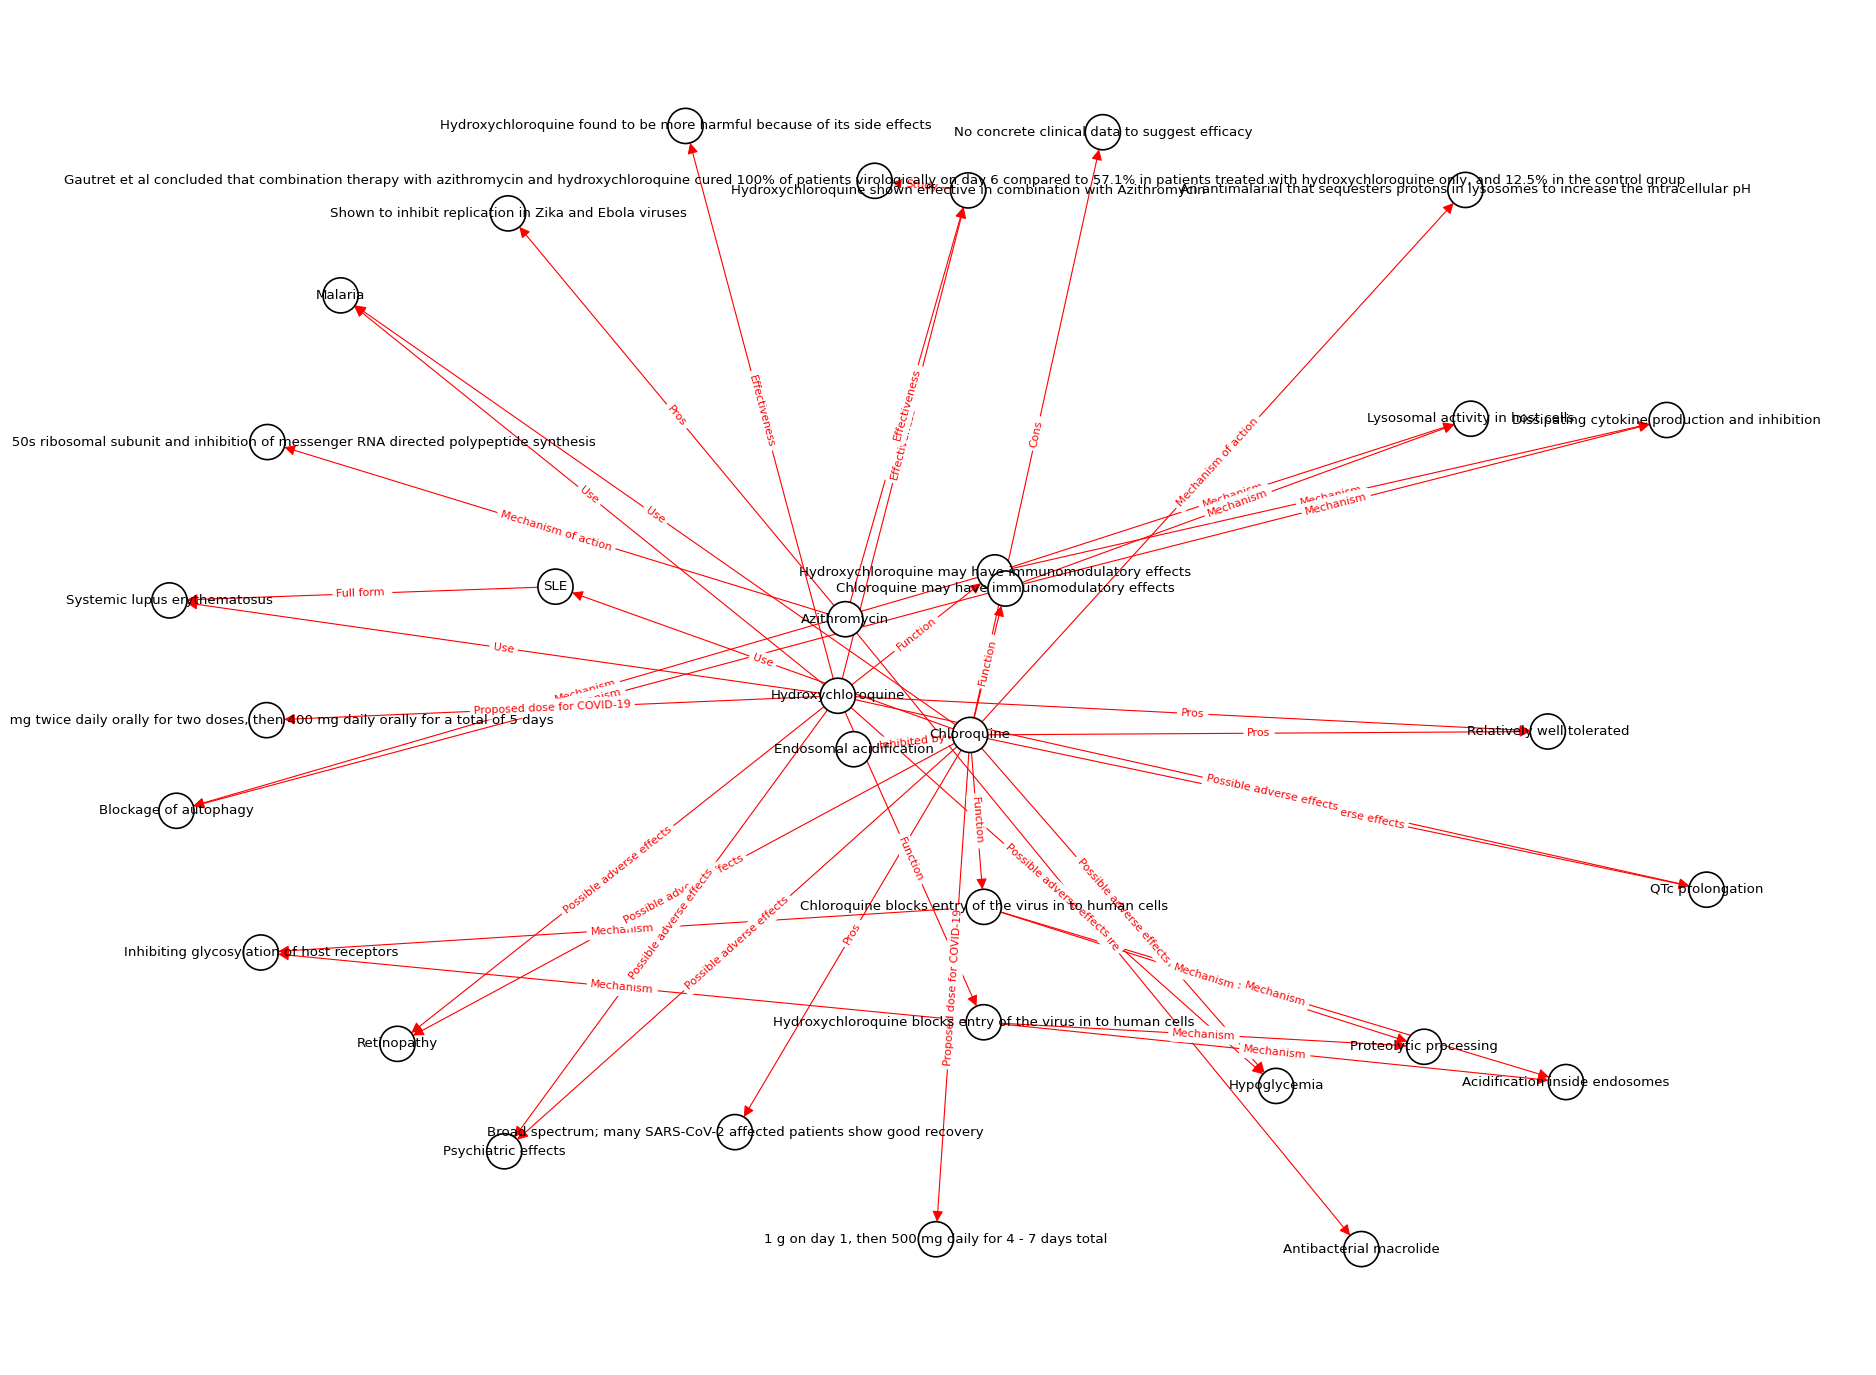

In [ ]:
depth_based_subgraph(corona_corpus,'Hydroxychloroquine',3,False)

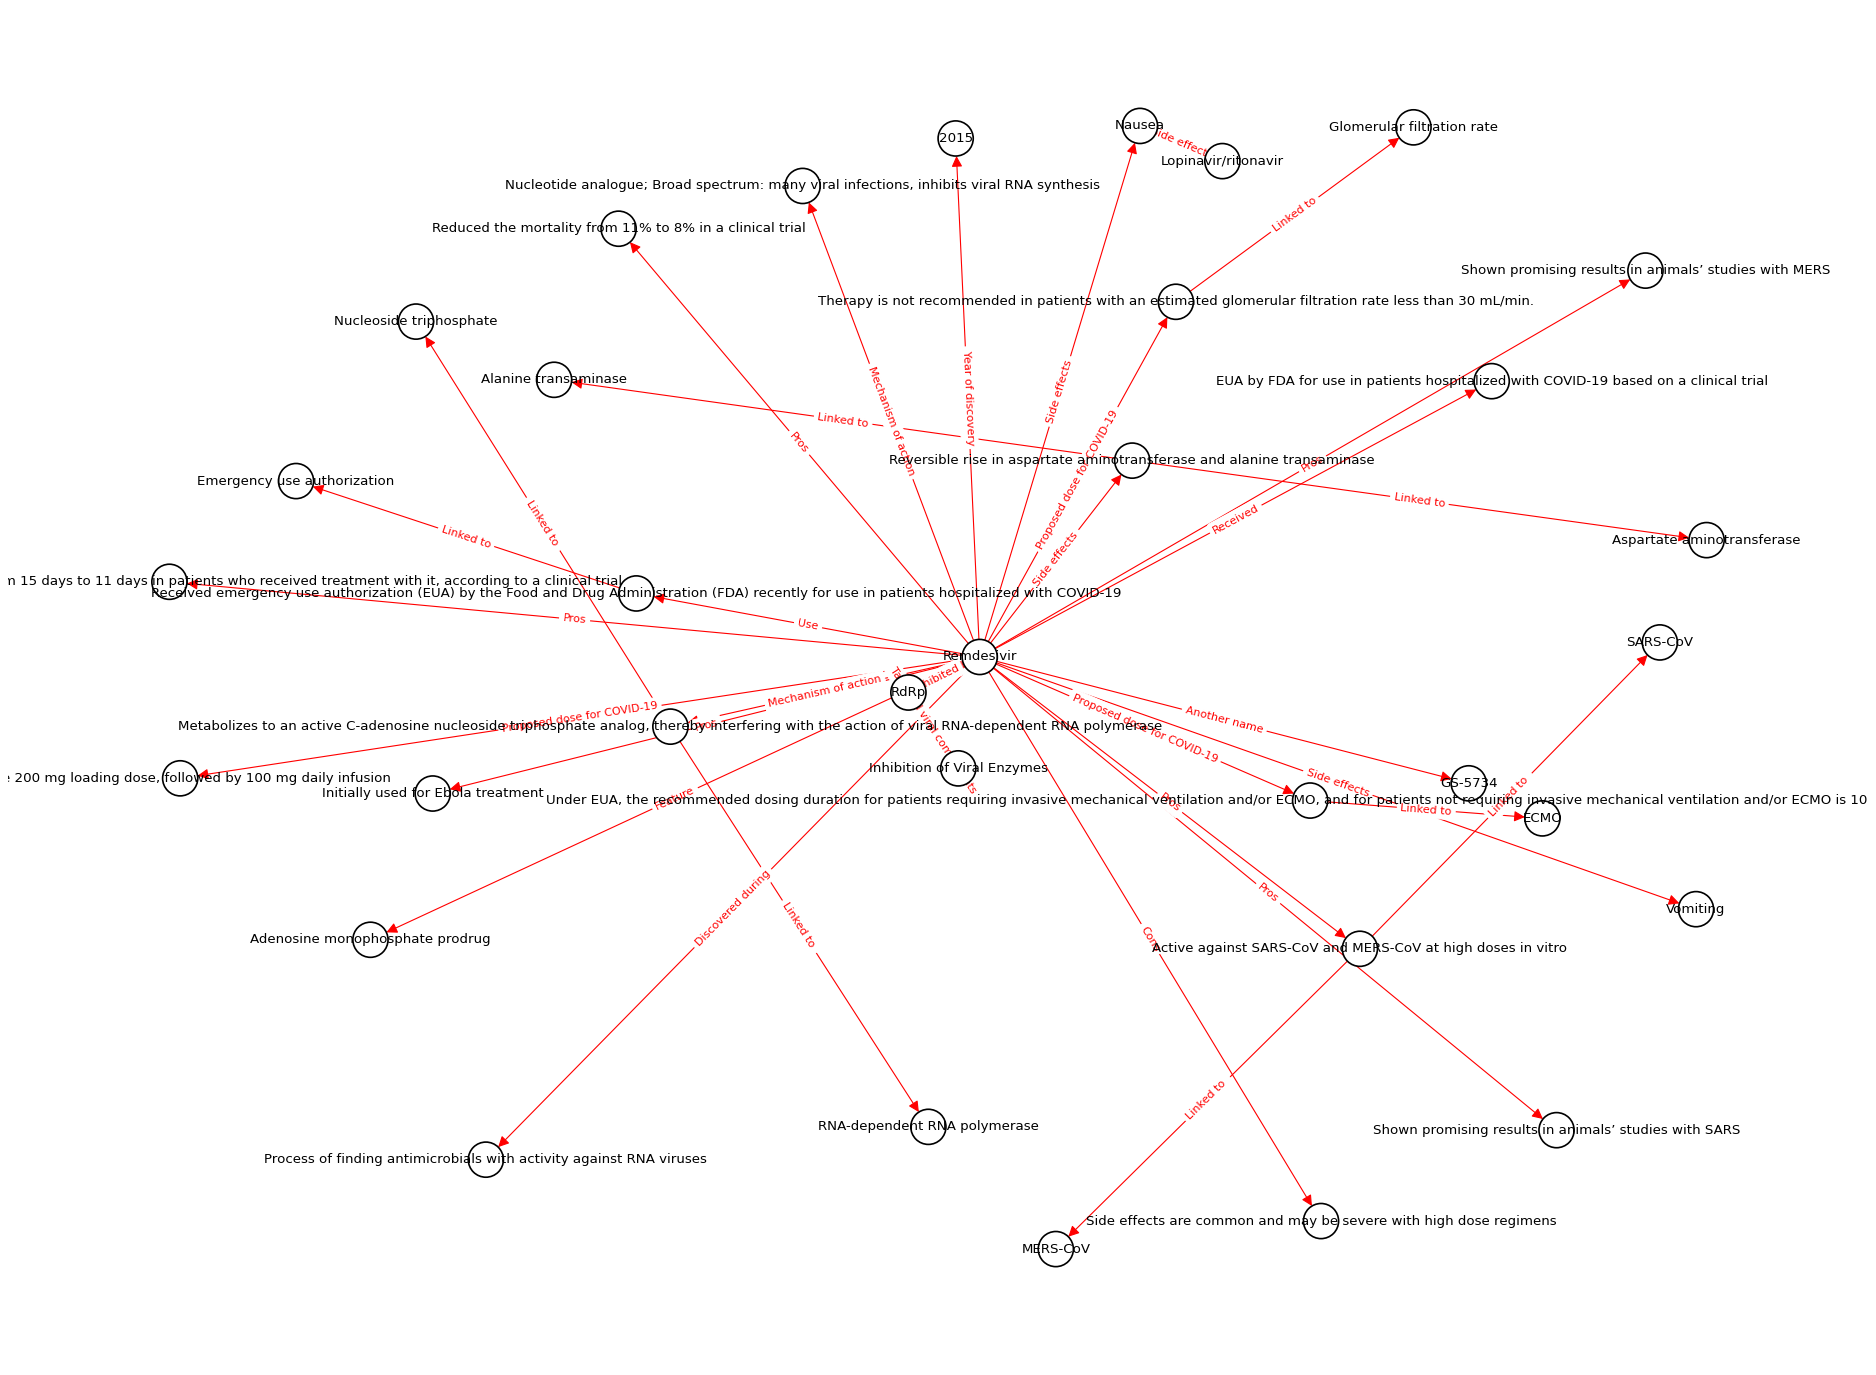

In [ ]:
depth_based_subgraph(corona_corpus,'Remdesivir',2,False)

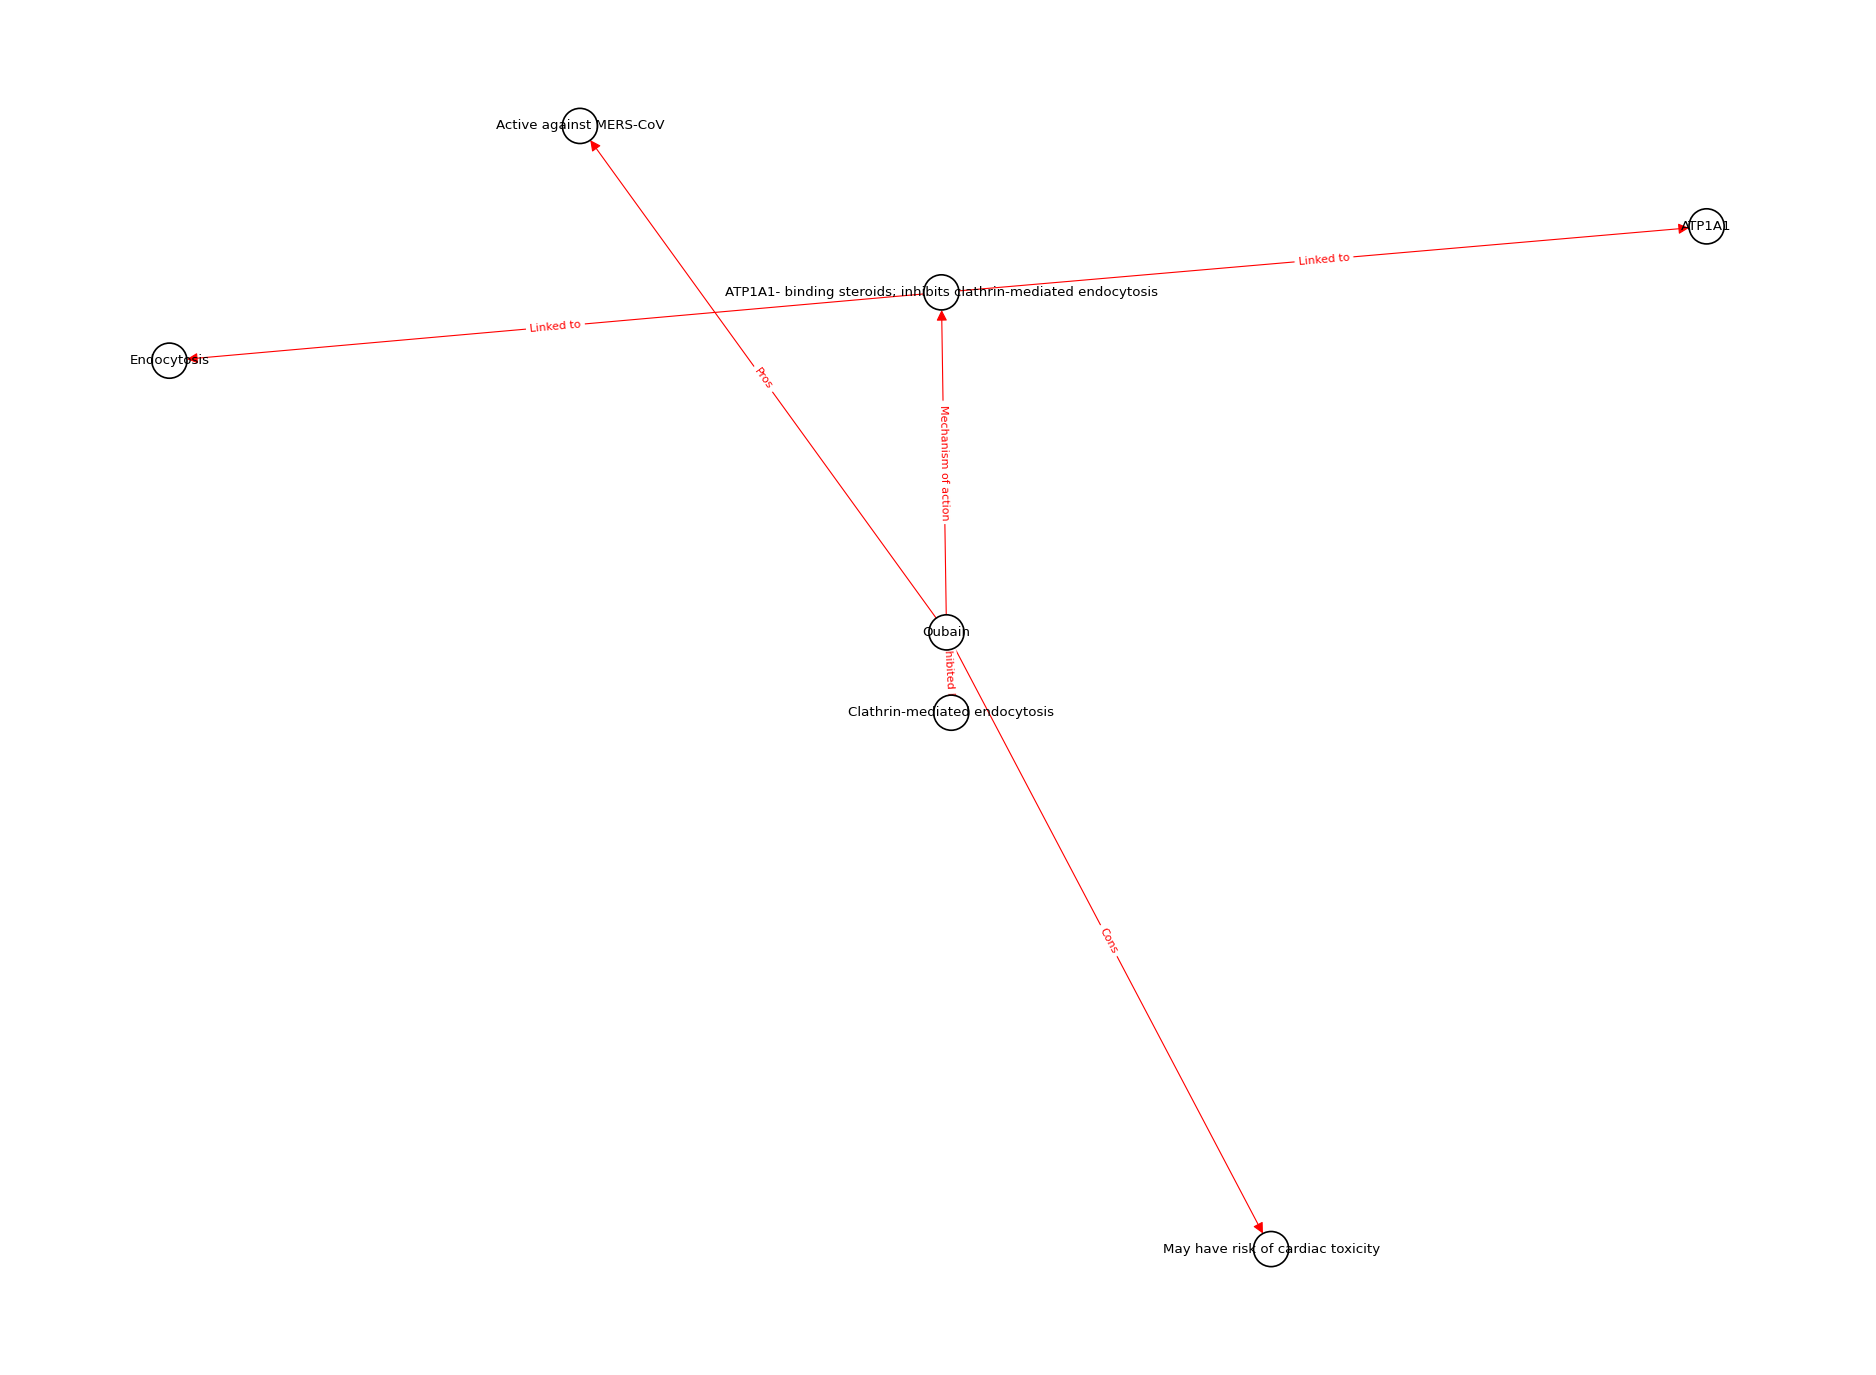

In [ ]:
generate_node_subgraph(corona_corpus,'Oubain',False)

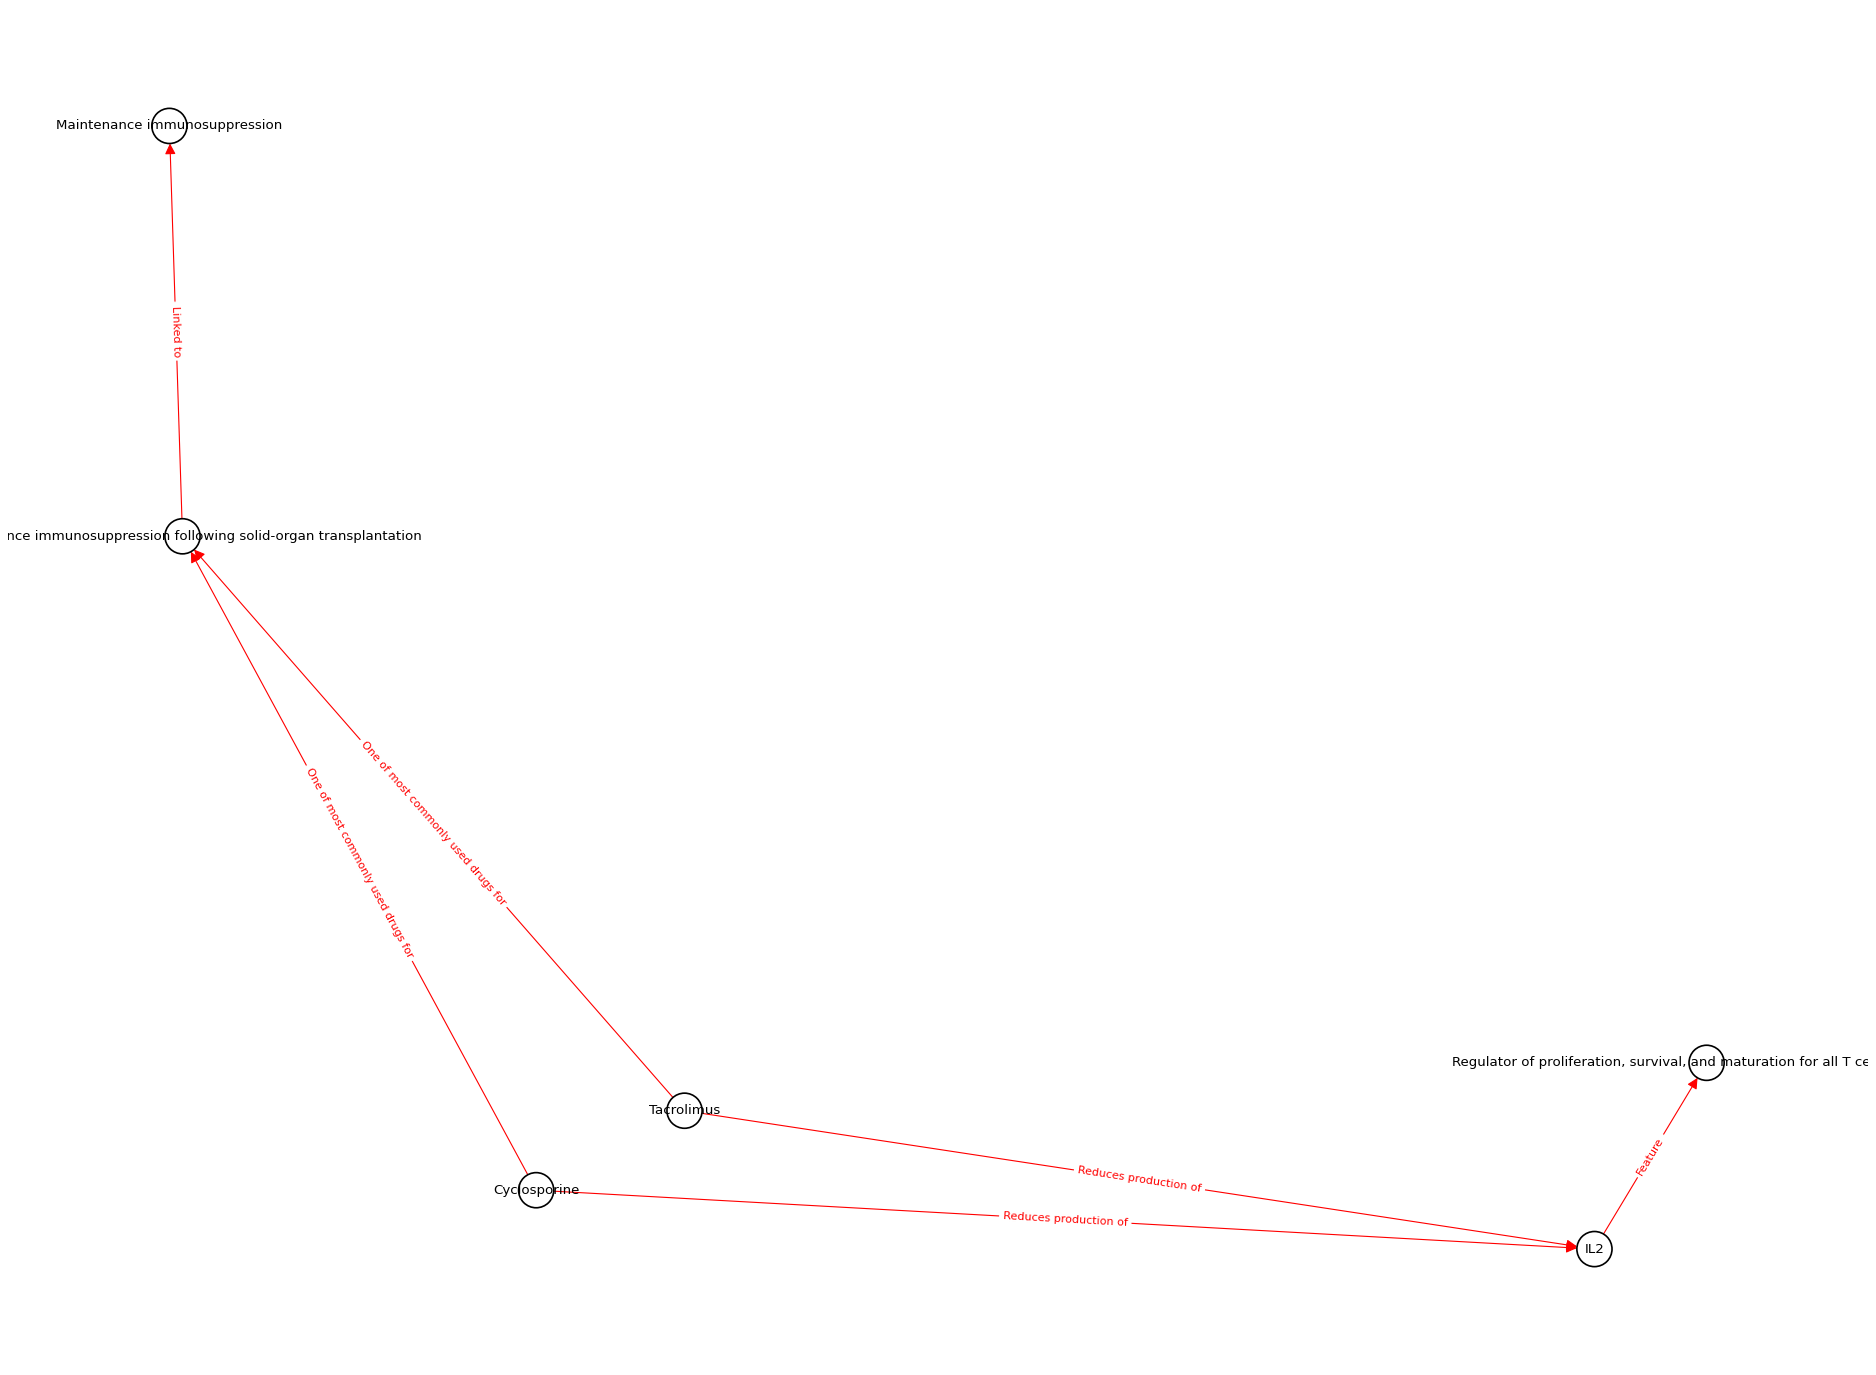

In [ ]:
generate_node_subgraph(corona_corpus,'Tacrolimus',False)

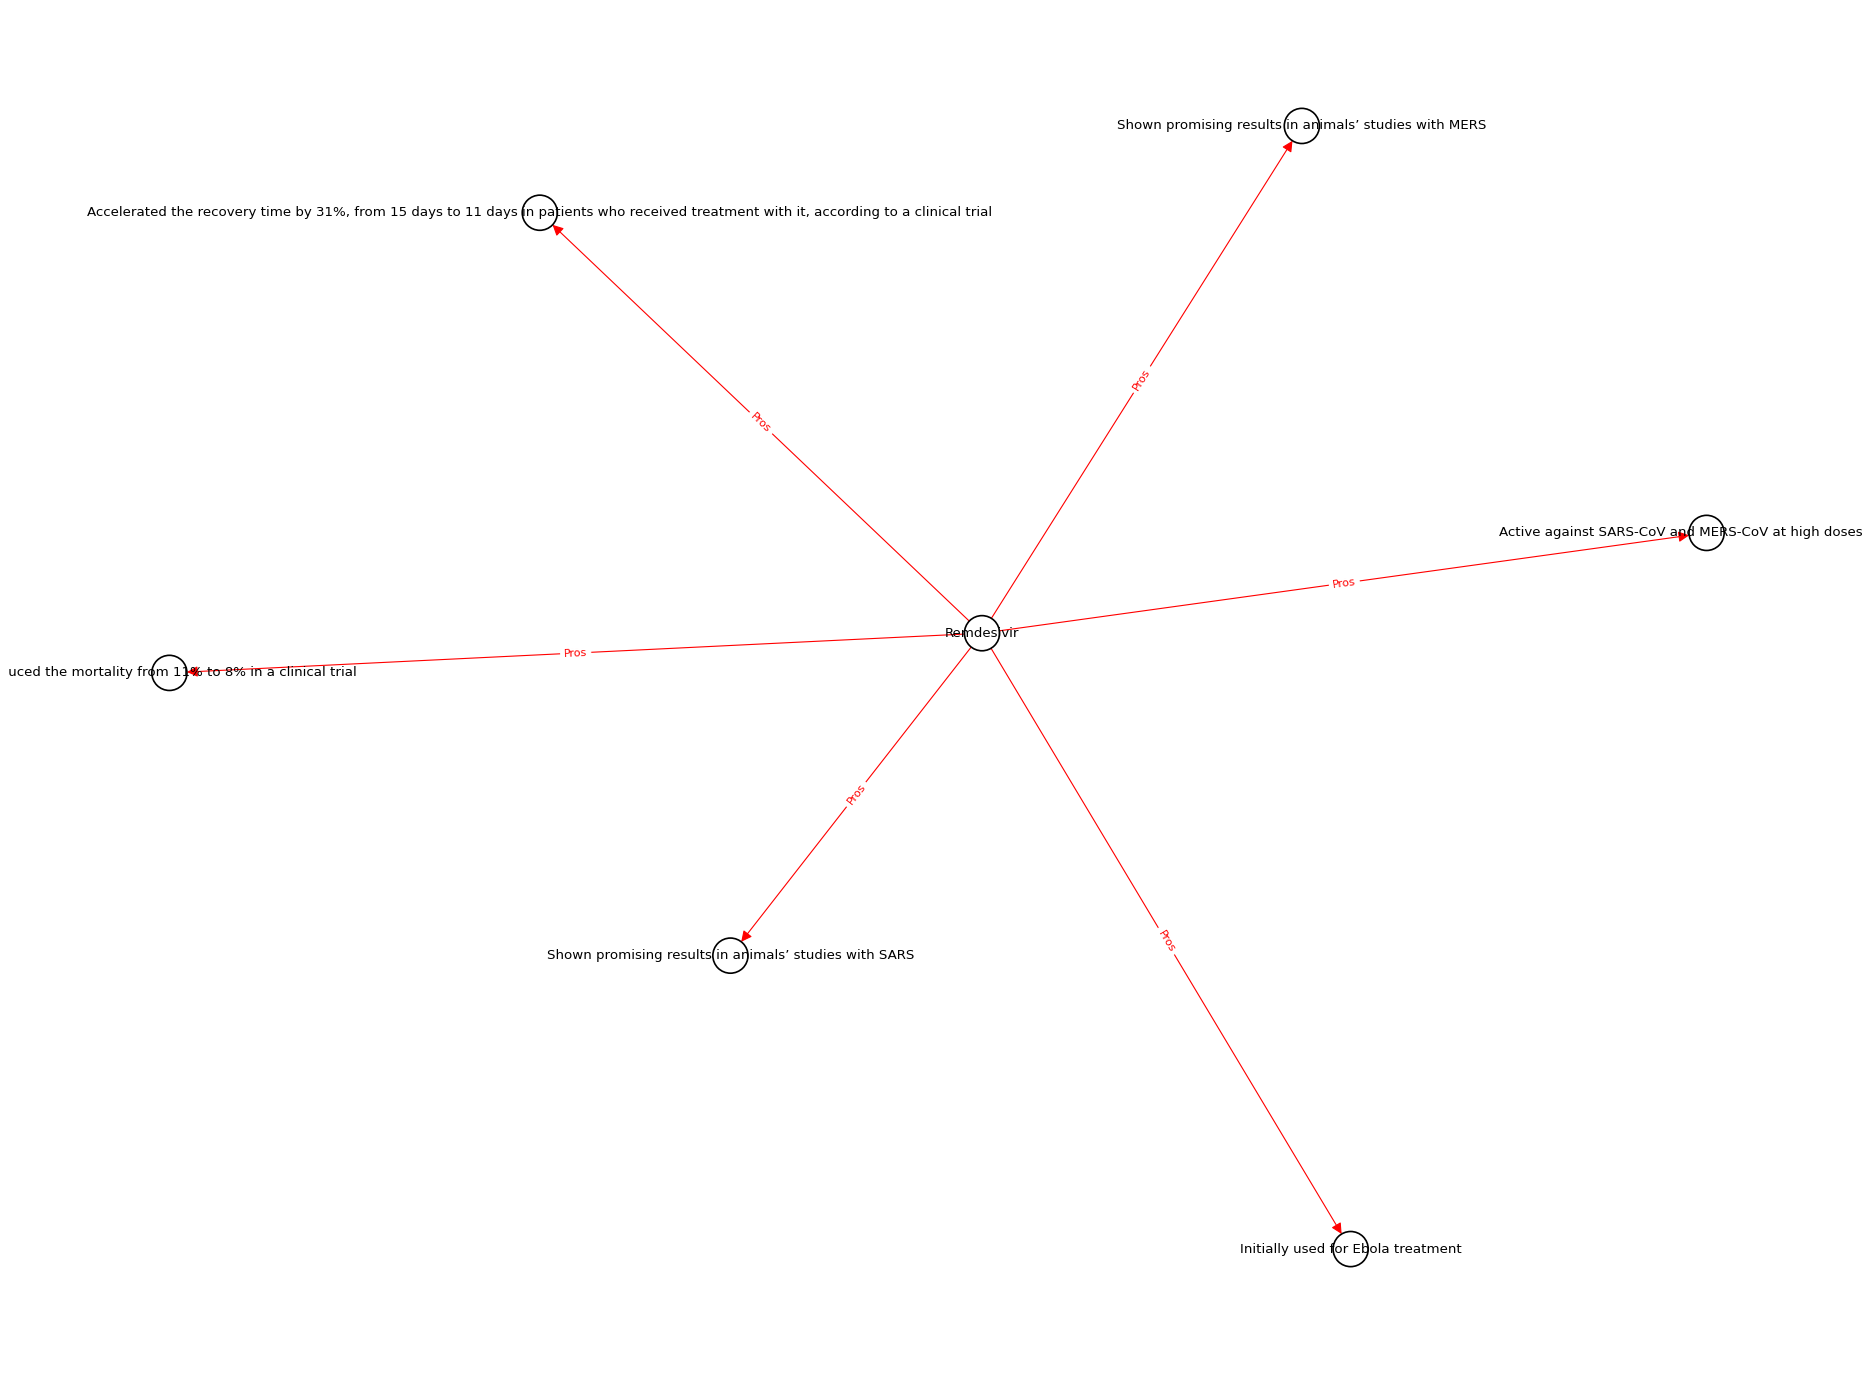

In [ ]:
generate_relation_link(corona_corpus,'Remdesivir','Pros',False)

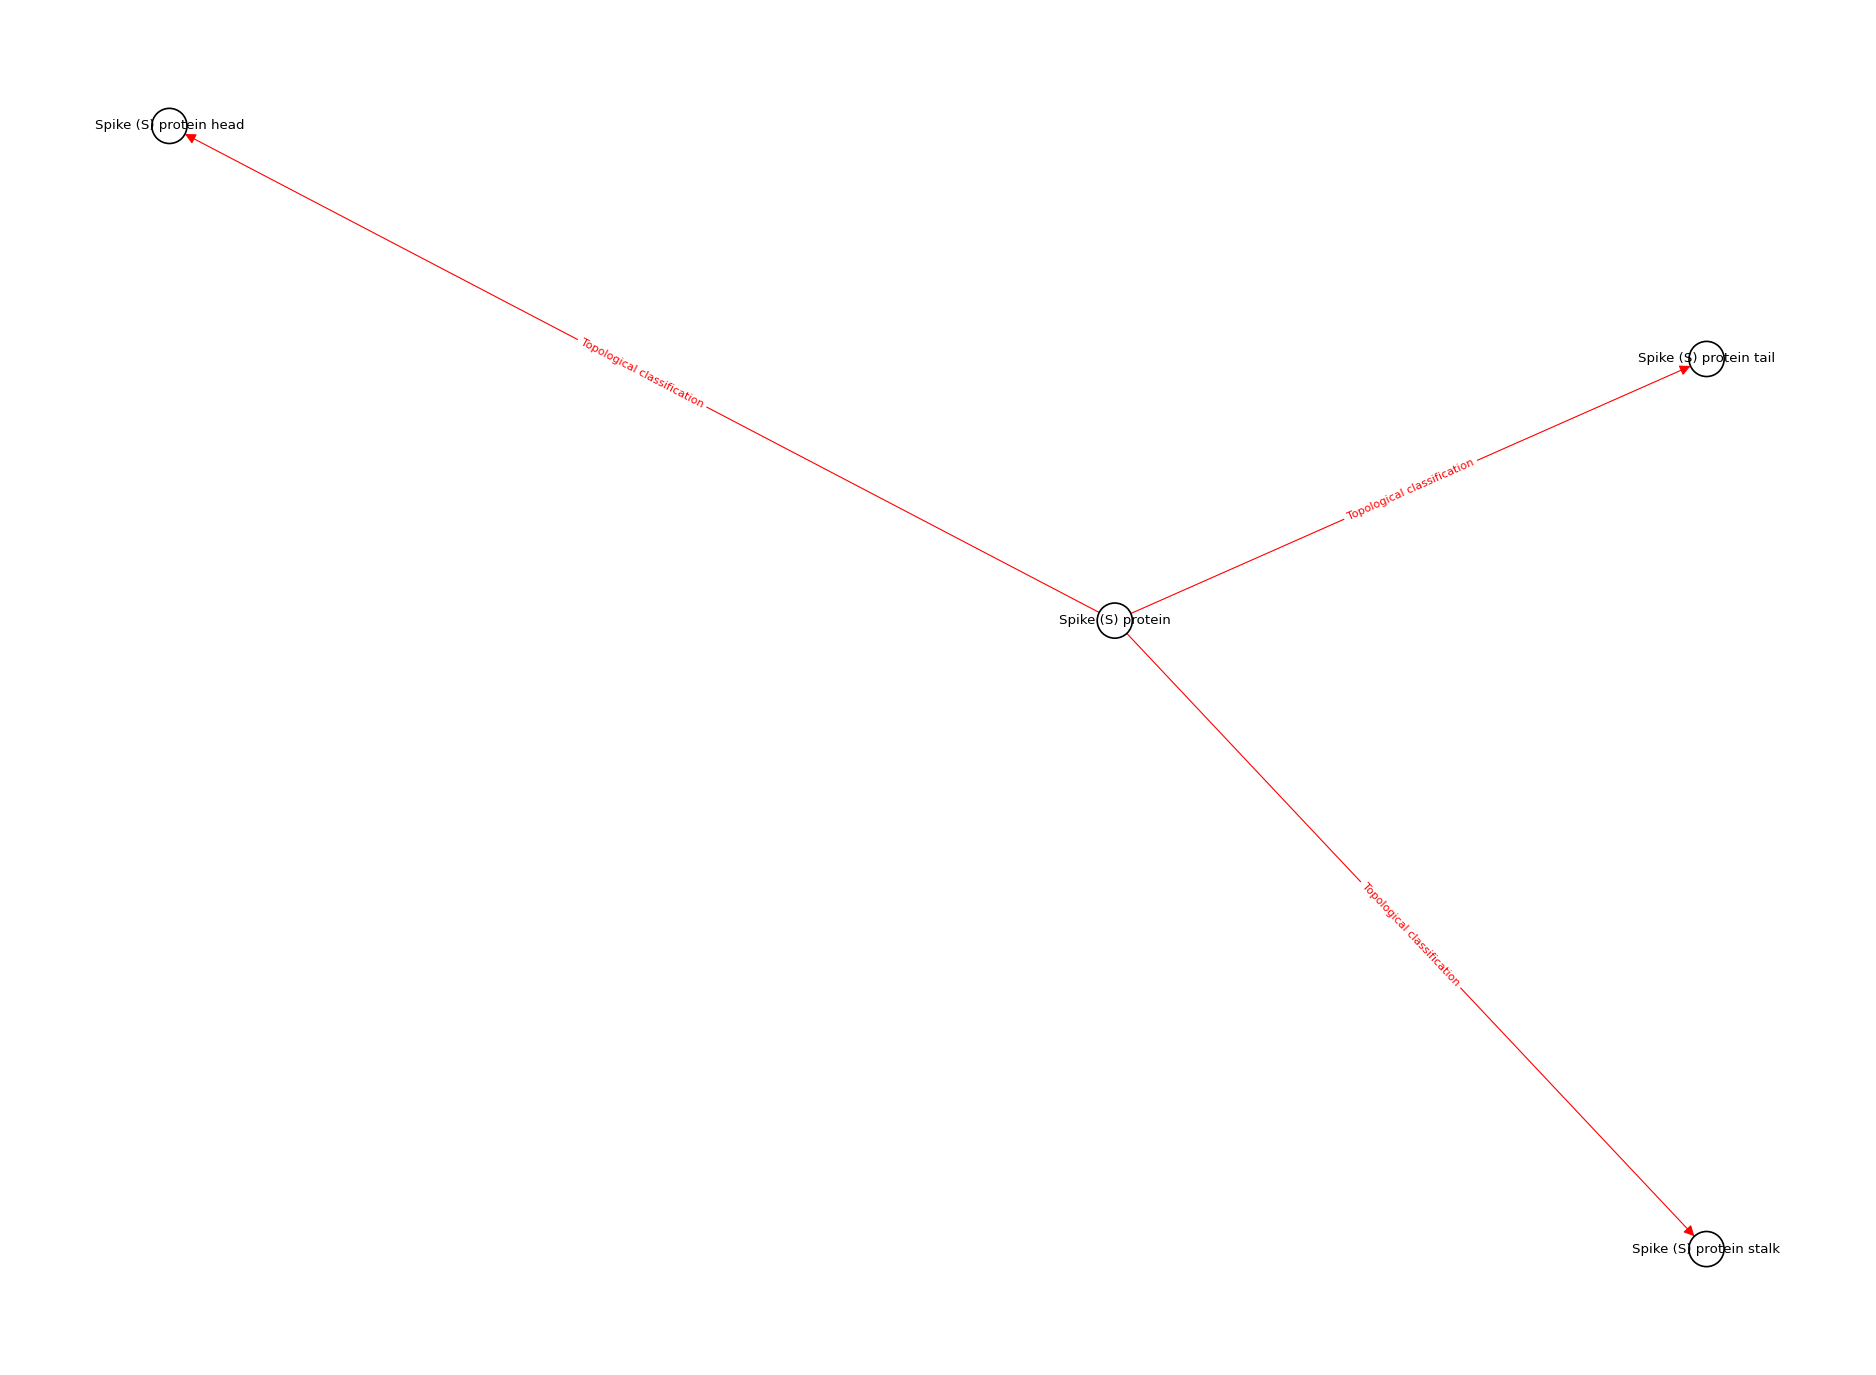

In [ ]:
generate_relation_link(corona_corpus,'Spike (S) protein','Topological classification',False)